# [Problem Statement](https://www.kaggle.com/datasets/dskagglemt/hackerearth-predict-the-churn-risk-rate)

- Churn rate is a marketing metric that describes the possibility of customers leaving a business over a specific time period.

- Understanding and detecting churn is the first step to retaining these customers and improving the company's offerings.

- Goal is to predict the churn score rate of a website based on the features provided in the dataset, Identify customers who are likely to leave so that we can retain then with some special offers on membership.

# Columns

1. ``age`` Represents the age of a customer
2. ``gender`` Represents the gender of a customer
3. ``security_no`` Represents a unique security number that is used to identify a person
4. ``region_category`` Represents the region that a customer belongs to
5. ``membership_category`` Represents the category of the membership that a customer is using
6. ``joining_date`` Represents the date when a customer became a member
7. ``joined_through_referral`` Represents whether a customer joined using any referral code or ID
8. ``referral_id`` Represents a referral ID
9. ``preferred_offer_types`` Represents the type of offer that a customer prefers
10. ``medium_of_operation`` Represents the medium of operation that a customer uses for transactions
11. ``internet_option`` Represents the type of internet service a customer uses
12. ``last_visit_time`` Represents the last time a customer visited the website
13. ``days_since_last_login`` Represents the no. of days since a customer last logged into the website
14. ``avg_time_spent`` Represents the average time spent by a customer on the website
15. ``avg_transaction_value`` Represents the average transaction value of a customer
16. ``avg_frequency_login_days`` Represents the no. of times a customer has logged in to the website
17. ``points_in_wallet`` Represents the points awarded to a customer on each transaction
18. ``used_special_discount`` Represents whether a customer uses special discounts offered
19. ``offer_application_preference`` Represents whether a customer prefers offers
20. ``past_complaint`` Represents whether a customer has raised any complaints
21. ``complaint_status`` Represents whether the complaints raised by a customer was resolved
22. ``feedback`` Represents the feedback provided by a customer
23. ``churn_risk_score`` 1 to 5

# Importing libraries and data

In [226]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import f1_score
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.linear_model as sklm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, label_binarize

from scipy.stats import chi2_contingency
from sklearn import neighbors
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

!pip install pydotplus -qq
import pydotplus
from IPython.display import Image


import random
import gdown
import zipfile
import os
seed = 5
np.random.seed(seed)

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12,8)

# Load Dataset

In [2]:
# Define the URL and the output file path
url = 'https://drive.google.com/uc?id=1hyNhdjSolT78wOZkb_Ckw-t8CjfaWbmt'
output = 'dataset.zip'

# Download the file from Google Drive
gdown.download(url, output, quiet=False)

# Unzip the downloaded file
extracted_path = 'extracted_dataset'
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List all files in the extracted directory
extracted_files = os.listdir(extracted_path)

# Assuming the filenames contain 'train' and 'test' to differentiate the datasets
train_file = [file for file in extracted_files if 'train' in file.lower() and file.endswith('.csv')]
test_file = [file for file in extracted_files if 'test' in file.lower() and file.endswith('.csv')]

# Check if the train and test files are found
if train_file and test_file:
    train_file_path = os.path.join(extracted_path, train_file[0])
    test_file_path = os.path.join(extracted_path, test_file[0])

    # Read the CSV files into pandas DataFrames
    df_train = pd.read_csv(train_file_path)
    df_test = pd.read_csv(test_file_path)

# Optionally remove the zip file after extraction
os.remove(output)


Downloading...
From: https://drive.google.com/uc?id=1hyNhdjSolT78wOZkb_Ckw-t8CjfaWbmt
To: /content/dataset.zip
100%|██████████| 3.59M/3.59M [00:00<00:00, 116MB/s]


In [3]:
df_train

customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category joining_date  \
0         XW0DQ7H         Village  Platinum Membership   2017-08-17   
1         5K0N3X1            City   Premium Membership   2017-08-28   
2         1F2TCL3            Town        No Membership   2016-11-11   
3         VJGJ33N            City        No Membership   2016-10-29   
4         SVZXCWB            City        No Membership   2017-09-12   
...           ...             ...                  ...          ...   
36987     6F51HFO             NaN     Basic Membership   2017-09-21   
36988     21KSM8Y            Town     Basic Membership   2016-06-27   
36989     XK1IM9H             NaN     Basic Membership   2016-09-11   
36990     K6VTP1Z         Village  Platinum Membership   2017-06-15   
36991     LBX0GLR            Town    Silver Membership   2015-10-23   

      joined_through_referral referral_id  ... avg_time_spent  \
0                          No    xxxxxxxx  ...     300.630000   
1                           ?    CID21329  ...     306.340000   
2                         Yes    CID12313  ...     516.160000   
3                         Yes     CID3793  ...      53.270000   
4                          No    xxxxxxxx  ...     113.130000   
...                       ...         ...  ...            ...   
36987                      No    xxxxxxxx  ...    -650.682759   
36988                      No    xxxxxxxx  ...    -638.123421   
36989                     Yes     CID3838  ...     154.940000   
36990                      No    xxxxxxxx  ...     482.610000   
36991                      No    xxxxxxxx  ...      79.180000   

      avg_transaction_value avg_frequency_login_days points_in_wallet  \
0                  53005.25                     17.0       781.750000   
1                  12838.38                     10.0              NaN   
2                  21027.00                     22.0       500.690000   
3                  25239.56                      6.0       567.660000   
4                  24483.66                     16.0       663.060000   
...                     ...                      ...              ...   
36987              27277.68                      6.0       639.510000   
36988              11069.71                     28.0       527.990000   
36989              38127.56                    Error       680.470000   
36990               2378.86                     20.0       197.264414   
36991               2189.68                    Error       719.970000   

       used_special_discount  offer_application_preference  past_complaint  \
0                        Yes                           Yes              No   
1                        Yes                            No             Yes   
2                         No                           Yes             Yes   
3                         No                           Yes             Yes   
4                         No                           Yes             Yes   
...                      ...                           ...             ...   
36987                     No                      

In [4]:
df_test

customer_id              Name  age gender  \
0      fffe43004900440031003700300030003400    Alethia Meints   50      F   
1      fffe43004900440031003900370037003300        Ming Lopez   41      M   
2      fffe43004900440034003800360037003000  Carina Flannigan   31      F   
3      fffe43004900440036003200370033003400      Kyung Wanner   64      M   
4      fffe43004900440035003000370031003900       Enola Gatto   16      F   
...                                     ...               ...  ...    ...   
19914  fffe43004900440035003600330037003800       Kraig Peele   12      M   
19915  fffe43004900440032003900370037003100     Damaris Sabol   40      F   
19916  fffe43004900440036003100310036003700    Loura Huckstep   55      M   
19917  fffe43004900440034003200330033003600     Sharita Clubb   17      F   
19918  fffe43004900440036003200340030003100       Ying Branum   20      M   

      security_no region_category membership_category joining_date  \
0         OQJ1XAY         Village  Premium Membership   2015-11-02   
1         OUQRPKO         Village     Gold Membership   2016-03-01   
2         02J2RE7            Town   Silver Membership   2017-03-03   
3         5YEQIF1            Town   Silver Membership   2017-08-18   
4         100RYB5            Town       No Membership   2015-05-05   
...           ...             ...                 ...          ...   
19914     2V0HA0O             NaN     Gold Membership   2015-01-25   
19915     VJGQD6Q         Village       No Membership   2017-12-31   
19916     ADE7LWA            Town       No Membership   2015-09-09   
19917     A35KUBS            City   Silver Membership   2016-04-17   
19918     IPJKJJV            Town  Premium Membership   2017-10-30   

      joined_through_referral referral_id  ... days_since_last_login  \
0                          No    xxxxxxxx  ...                    12   
1                          No    xxxxxxxx  ...                    11   
2                          No    xxxxxxxx  ...                    18   
3                         Yes     CID8941  ...                  -999   
4                         Yes     CID5690  ...                     6   
...                       ...         ...  ...                   ...   
19914                      No    xxxxxxxx  ...                    16   
19915                     Yes    CID45490  ...                    21   
19916                      No    xxxxxxxx  ...                    18   
19917                     Yes    CID37167  ...                     3   
19918                     Yes    CID56352  ...                     8   

      avg_time_spent avg_transaction_value avg_frequency_login_days  \
0             386.26              40721.44                      7.0   
1              37.80               9644.40                      9.0   
2             215.36               3693.25                     21.0   
3              44.57              36809.56                     11.0   
4             349.88              40675.86                      8.0   
...              ...                   ...                      ...   
19914         103.57              46279.35                     18.0   
19915          63.19              23466.26                    Error   
19916          68.72              17903.75                     24.0   
19917         119.54              14057.09                     22.0   
19918         505.26              36786.44                    Error   

       points_in_wallet  used_special_discount  offer_application_preference  \
0            733.830000                    Yes                            No   
1            726.000000                    Yes                            No   
2            713.780000                    Yes                            No   
3            744.970000                    Yes                            No   
4            299.048351                     No                           Yes   
...                 ...                    ...                      

In [5]:
df_train.shape

(36992, 25)

In [6]:
df_test.shape

(19919, 24)

# Data Distribution

## Numerical

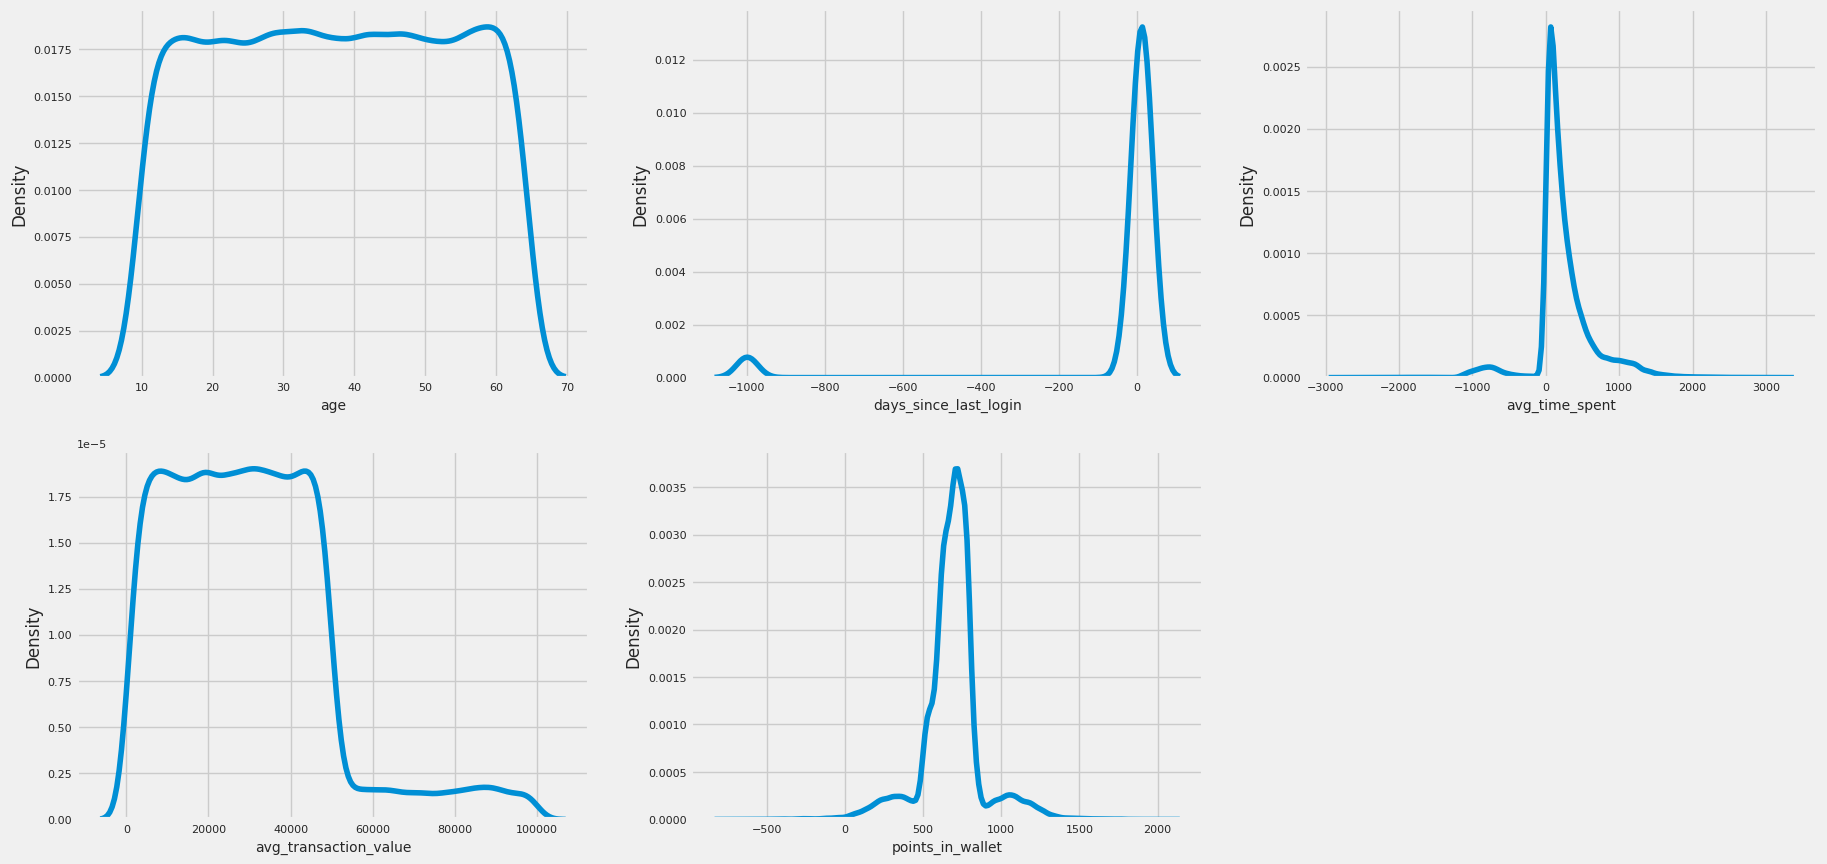

In [7]:
data_num = df_train.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number])
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

In [8]:
data_num.skew()

age                     -0.007319
days_since_last_login   -3.941356
avg_time_spent           0.539624
avg_transaction_value    1.011027
points_in_wallet        -0.080309
dtype: float64

1. ``days_since_last_login`` is highly left skewed
2. Features such as ``age`` and ``points_in_wallet`` are moderately left skewed
3. ``avg_transaction_value`` is right skewed.

## Categorical

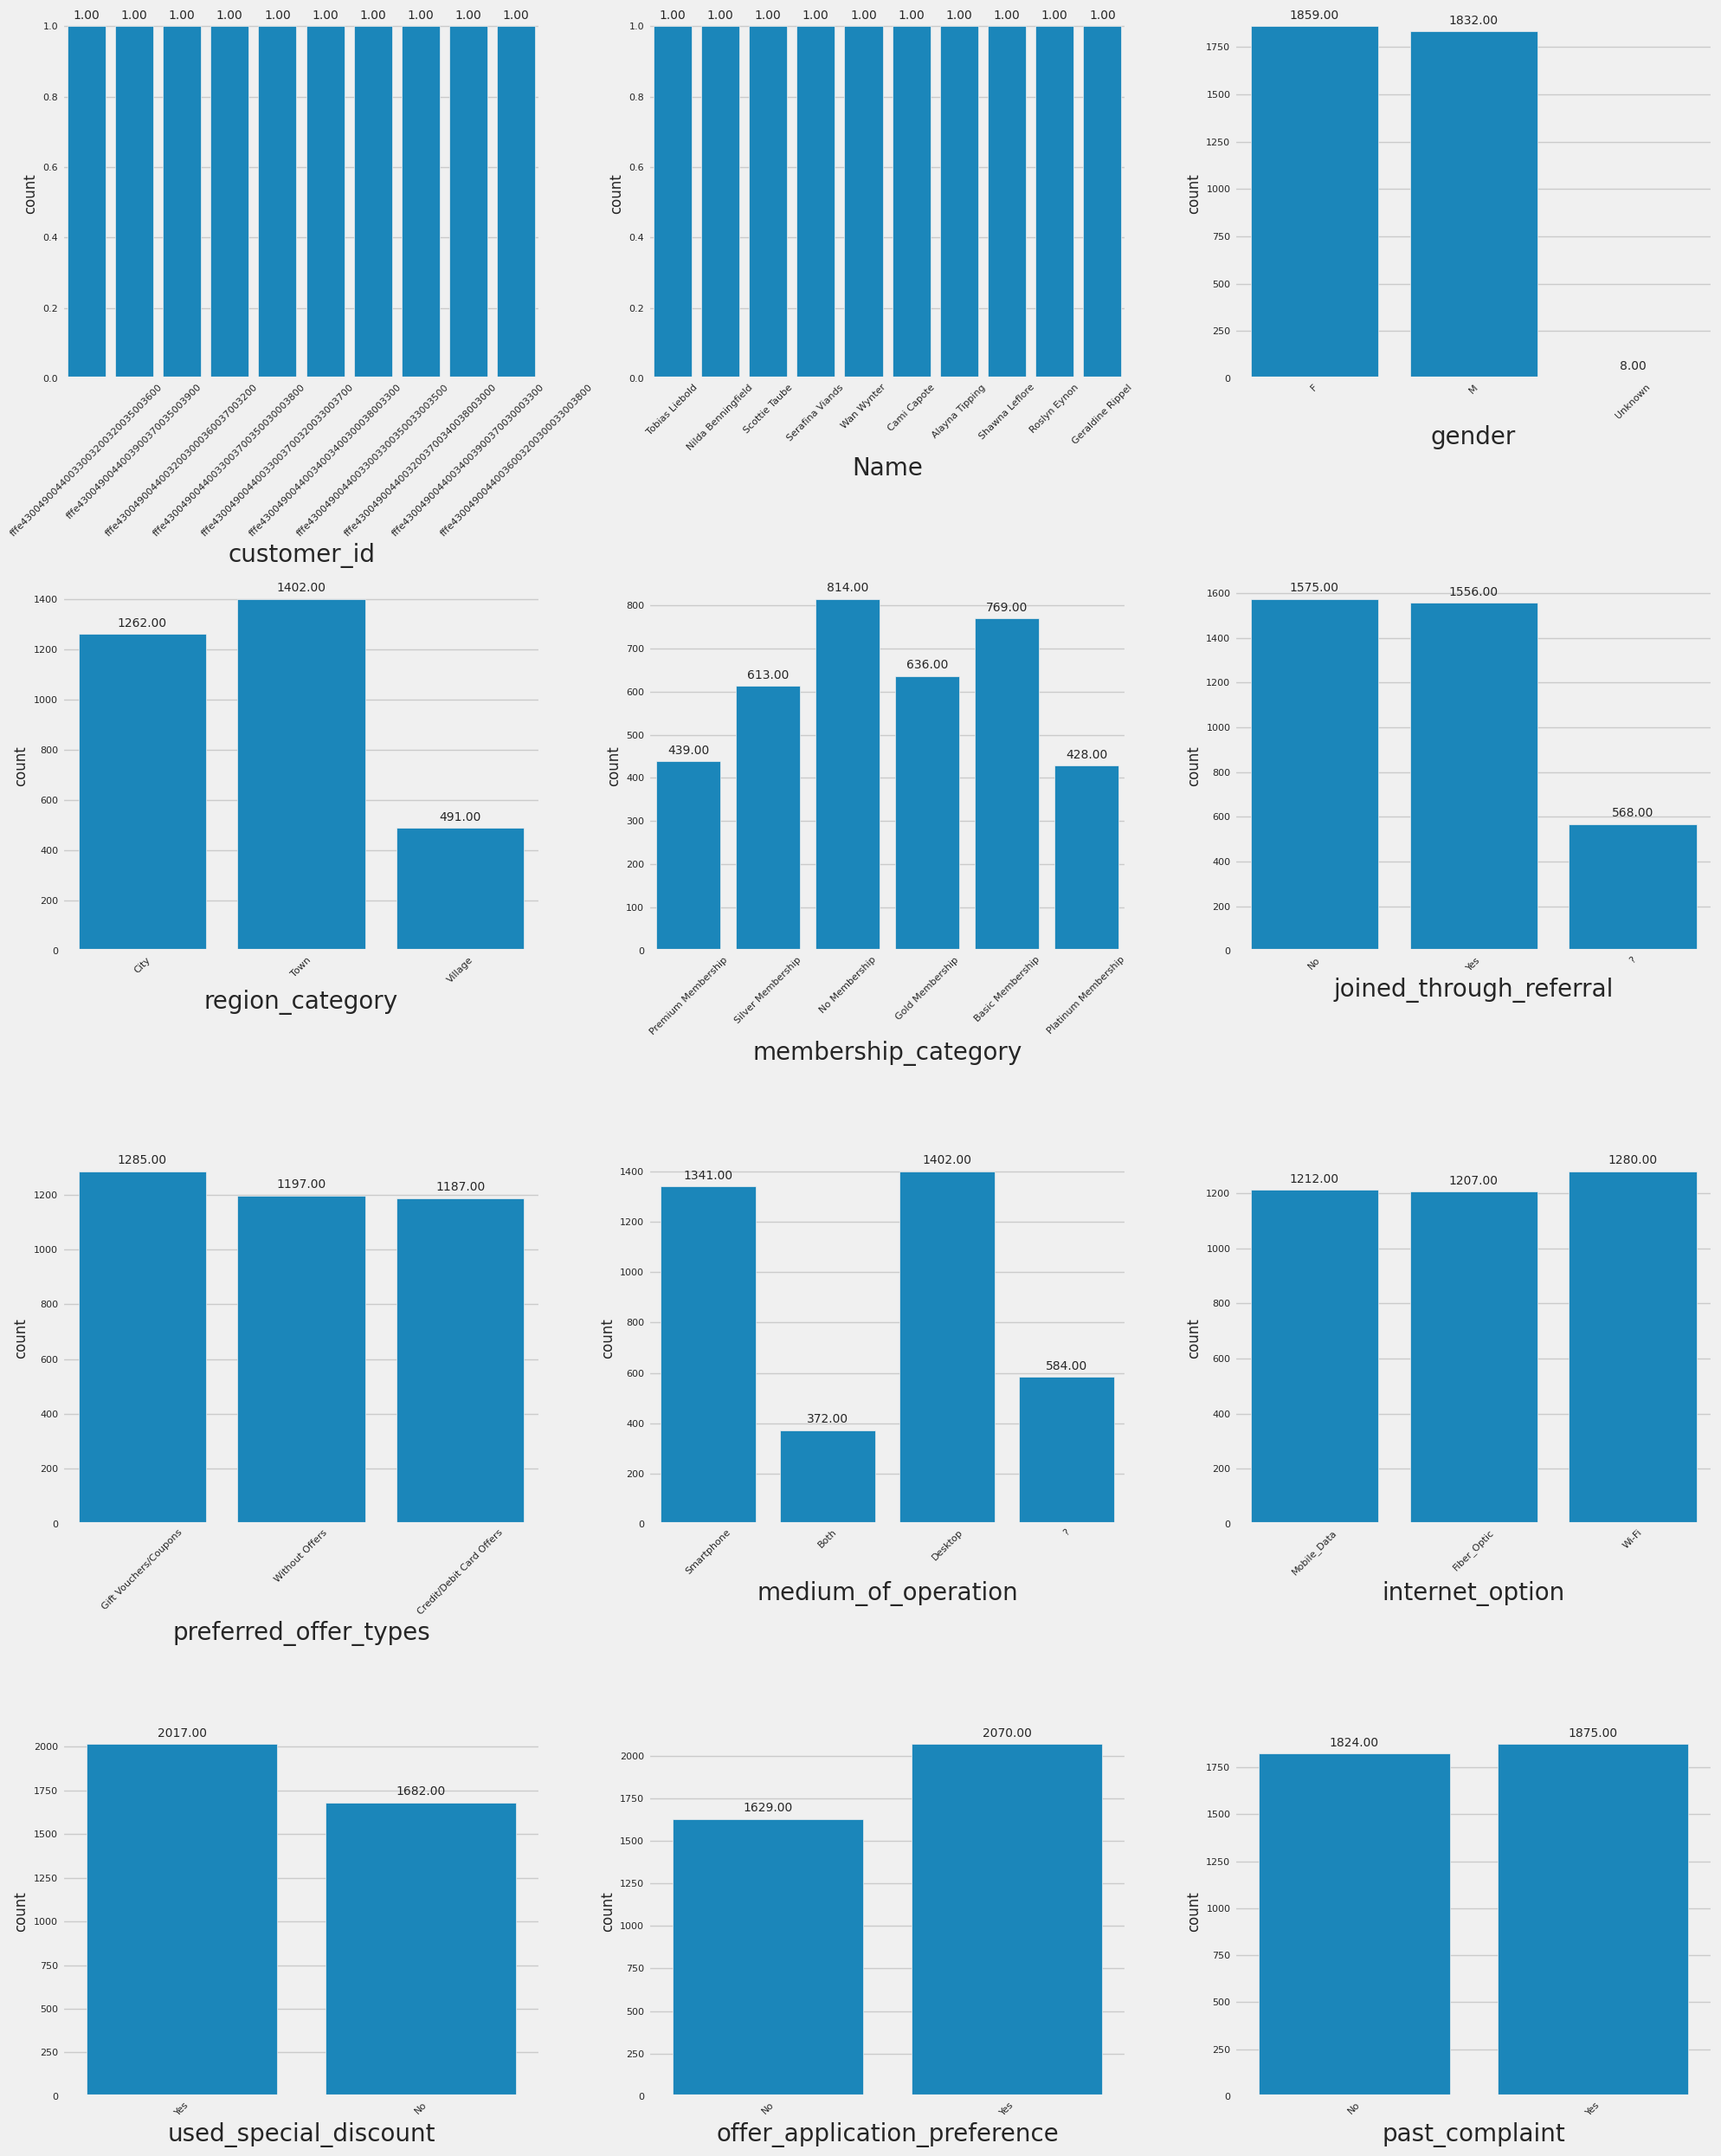

In [9]:
# Dropping specified columns and selecting only object type columns
data_cat = df_train.drop(['referral_id', 'last_visit_time', 'avg_frequency_login_days', 'security_no', 'joining_date'], axis=1).select_dtypes(include='object')

# Sample the data to speed up plotting (optional, you can adjust the fraction as needed)
data_cat_sampled = data_cat.sample(frac=0.1, random_state=42)

# Create a figure with subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))

for variable, subplot in zip(data_cat_sampled.columns, ax.flatten()):
    # Limit the number of unique categories for plotting if necessary
    if data_cat_sampled[variable].nunique() > 10:
        top_categories = data_cat_sampled[variable].value_counts().nlargest(10).index
        filtered_data = data_cat_sampled[data_cat_sampled[variable].isin(top_categories)]
    else:
        filtered_data = data_cat_sampled

    # Create count plot
    z = sns.countplot(x=filtered_data[variable], ax=subplot)
    z.set_xlabel(variable, fontsize=20)
    z.set_xticklabels(z.get_xticklabels(), rotation=45)

    # Add annotations to the bars
    for p in z.patches:
        z.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.show()

> 1. Both ``genders``, Male and Female are equally distributed and there is some noise.

> 2. Most of the customers are from town ``region`` while least number of customer belongs to village whcih is ~4600.

> 3. No & Basic category are leading one in ``membership_category`` while premium & platinum are least subscribed which is around ~4300+.

> 4. Around 15K customers have joined through ``referral`` program.

> 5. ``medium_of_operation`` & ``internet_option`` Most of the customers either use Desktop or Smartphone to access website.

> 6. Most of the customers has given negative ``feedback`` about the service such as poor website, poor customer service etc.

## Target

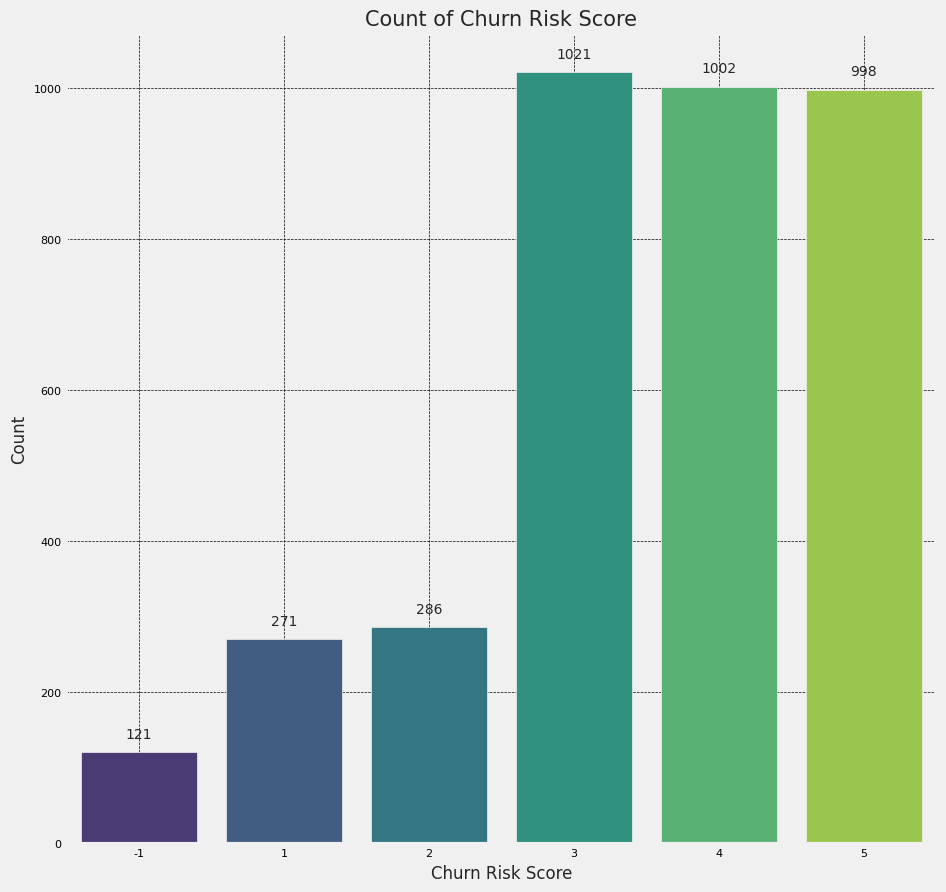

In [10]:
# Sample the data if it's too large (optional)
df_sample = df_train.sample(frac=0.1, random_state=42) if len(df_train) > 10000 else df_train

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the count plot for 'churn_risk_score'
ax = sns.countplot(x='churn_risk_score', data=df_sample, palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', xytext=(0, 10), textcoords='offset points')

# Set titles and labels
ax.set_title('Count of Churn Risk Score', fontsize=15)
ax.set_xlabel('Churn Risk Score', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Set x and y tick labels color
ax.tick_params(colors='black')

# Set grid lines for better readability in dark mode
plt.grid(True, color='black', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Data Discovery

## Basics

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [12]:
df_train.columns.values

array(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback',
       'churn_risk_score'], dtype=object)

In [13]:
df_train.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [14]:
df_train.describe(include=np.number)

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

1. Average age of customers who is likely to exit is 37
2. On average customers have around 680 point in wallet
3. Maximum no. of days since a customer logged in is 26

In [15]:
df_train.describe(include='object')

customer_id             Name gender security_no  \
count                              36992            36992  36992       36992   
unique                             36992            36992      3       36992   
top     fffe4300490044003600300030003800  Pattie Morrisey      F     XW0DQ7H   
freq                                   1                1  18490           1   

       region_category membership_category joining_date  \
count            31564               36992        36992   
unique               3                   6         1096   
top               Town    Basic Membership   2015-06-02   
freq             14128                7724           55   

       joined_through_referral referral_id  preferred_offer_types  \
count                    36992       36992                  36704   
unique                       3       11359                      3   
top                         No    xxxxxxxx  Gift Vouchers/Coupons   
freq                     15839       17846                  12349   

       medium_of_operation internet_option last_visit_time  \
count                36992           36992           36992   
unique                   4               3           30101   
top                Desktop           Wi-Fi        07:56:41   
freq                 13913           12413               6   

       avg_frequency_login_days used_special_discount  \
count                     36992                 36992   
unique                     1654                     2   
top                       Error                   Yes   
freq                       3522                 20342   

       offer_application_preference past_complaint complaint_status  \
count                         36992          36992            36992   
unique                            2              2                5   
top                             Yes             No   Not Applicable   
freq                          20440          18602            18602   

                    feedback  
count                  36992  
unique                     9  
top     Poor Product Quality  
freq                    6350

1. Most customers are Females belongs to Town
2. Most customers use Desktop to access website over wi-fi
3. Most customers have Basic Membership of the service

## Missing Values

### Plot Before

<Axes: >

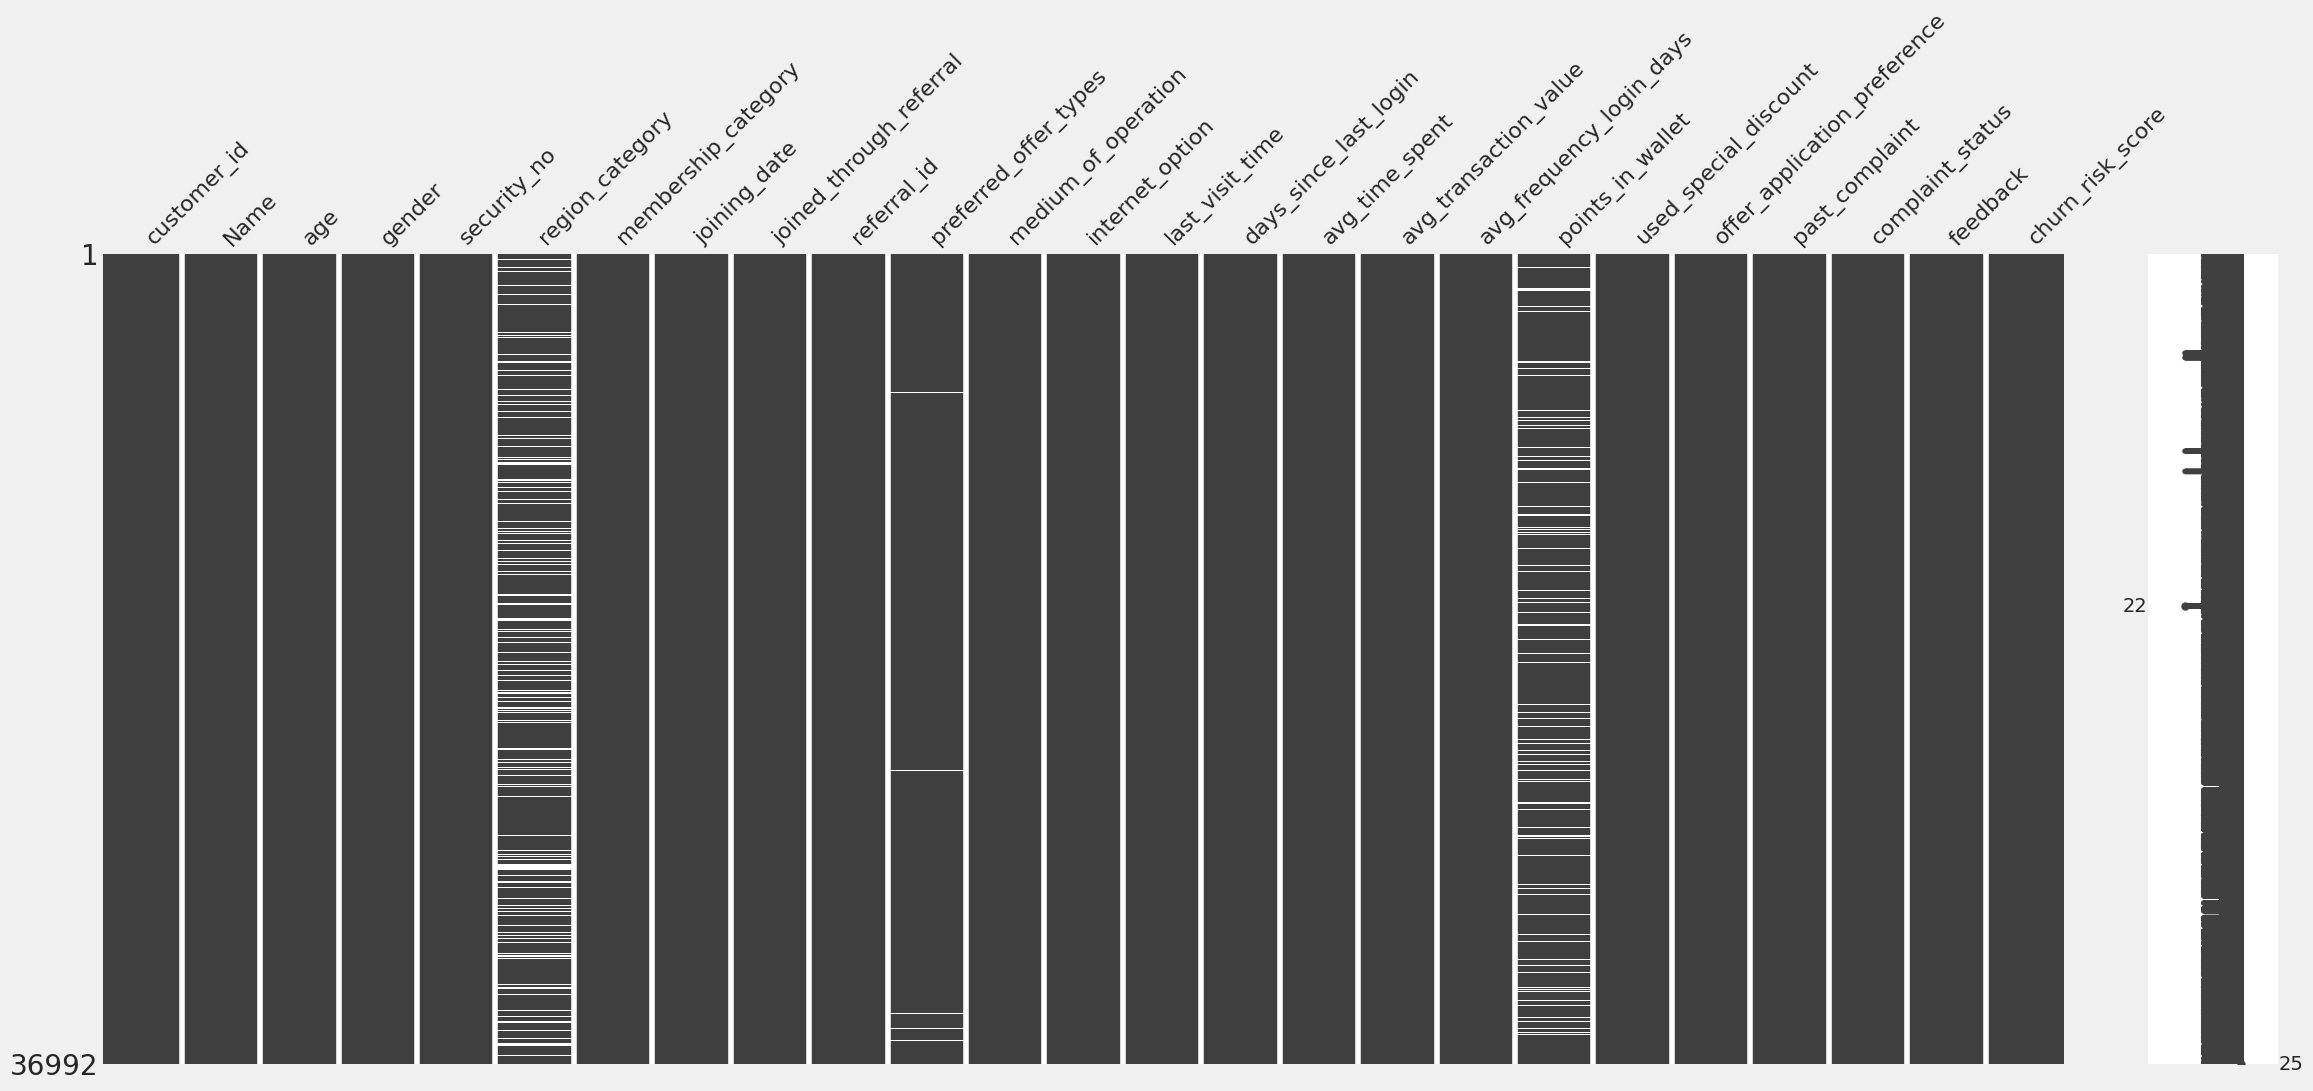

In [16]:
msno.matrix(df_train)

Using this matrix we can very quickly find the pattern of missingness in the dataset.

- From the above visualisation we can observe that it has no peculiar pattern that stands out.
- Only three columns seem to have mising values:
-1. region category
-2. preferred offer types
-3. points in wallet

In [17]:
missing_values = pd.DataFrame({
    'missing_values':df_train.isnull().sum(),
    'percentage':df_train.isnull().sum()*100/df_train.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

missing_values  percentage
region_category                         5428   14.673443
points_in_wallet                        3443    9.307418
preferred_offer_types                    288    0.778547
customer_id                                0    0.000000
days_since_last_login                      0    0.000000
feedback                                   0    0.000000
complaint_status                           0    0.000000
past_complaint                             0    0.000000
offer_application_preference               0    0.000000
used_special_discount                      0    0.000000
avg_frequency_login_days                   0    0.000000
avg_transaction_value                      0    0.000000
avg_time_spent                             0    0.000000
internet_option                            0    0.000000
last_visit_time                            0    0.000000
Name                                       0    0.000000
medium_of_operation                        0    0.000000
referral_id                                0    0.000000
joined_through_referral                    0    0.000000
joining_date                               0    0.000000
membership_category                        0    0.000000
security_no                                0    0.000000
gender                                     0    0.000000
age                                        0    0.000000
churn_risk_score                           0    0.000000

### Non Standard Missing Values

#### joined_through_referral

In [18]:
df_train['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [19]:
df_train['joined_through_referral'] = df_train['joined_through_referral'].replace('?',np.NaN)

#### gender

In [20]:
df_train['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [21]:
df_train['gender'] = df_train['gender'].replace('Unknown',np.NaN)

#### referral_id

In [22]:
df_train['referral_id'].value_counts()

referral_id
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: count, Length: 11359, dtype: int64

In [23]:
df_train['referral_id'] = df_train['referral_id'].replace('xxxxxxxx',np.NaN)

#### medium_of_operation

In [24]:
df_train['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [25]:
df_train['medium_of_operation'] = df_train['medium_of_operation'].replace('?',np.NaN)

#### days_since_last_login

In [26]:
df_train['days_since_last_login'].value_counts()

days_since_last_login
 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: count, dtype: int64

In [27]:
df_train['days_since_last_login'] = df_train['days_since_last_login'].replace(-999,np.NaN)

In [28]:
df_train['days_since_last_login'].value_counts()

days_since_last_login
12.0    2380
13.0    2373
14.0    2307
15.0    2278
11.0    2262
10.0    2091
16.0    2068
9.0     1863
17.0    1747
8.0     1571
18.0    1444
7.0     1442
19.0    1308
6.0     1257
5.0     1234
20.0    1184
21.0    1015
4.0      998
22.0     895
3.0      852
23.0     727
2.0      613
24.0     471
1.0      328
25.0     203
26.0      82
Name: count, dtype: int64

In [29]:
len(df_train[df_train['days_since_last_login'] < 0]['days_since_last_login'])

0

In [30]:
df_train['days_since_last_login'].describe()

count    34993.000000
mean        12.758552
std          5.572600
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         26.000000
Name: days_since_last_login, dtype: float64

#### avg_time_spent

In [31]:
df_train['avg_time_spent'].describe()

count    36992.000000
mean       243.472334
std        398.289149
min      -2814.109110
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64

In [32]:
len(df_train[df_train['avg_time_spent'] < 0]['avg_time_spent'])

1719

In [33]:
df_train['avg_time_spent']=df_train['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

#### points_in_wallet

In [34]:
df_train['points_in_wallet'].describe()

count    33549.000000
mean       686.882199
std        194.063624
min       -760.661236
25%        616.150000
50%        697.620000
75%        763.950000
max       2069.069761
Name: points_in_wallet, dtype: float64

In [35]:
len(df_train[df_train['points_in_wallet']  < 0]['points_in_wallet'])

136

In [36]:
df_train['points_in_wallet']=df_train['points_in_wallet'].apply(lambda x:x if x>=0 else np.nan)

### Churn Rate Score

In [37]:
df_train['churn_risk_score'].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [38]:
df_train['churn_risk_score']=df_train['churn_risk_score'].apply(lambda x:x if x>=0 else np.nan)

#### avg_frequency_login_days



> it has negative values as well as Error





In [39]:
df_train['avg_frequency_login_days'].describe()

count     36992
unique     1654
top       Error
freq       3522
Name: avg_frequency_login_days, dtype: object

In [40]:
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].apply(lambda x:x if x!='Error' else -1)
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].astype('float')
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [41]:
len(df_train[df_train['avg_frequency_login_days']  < 0]['avg_frequency_login_days'])

0

In [42]:
df_train['avg_frequency_login_days']=df_train['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

### Plot After

<Axes: >

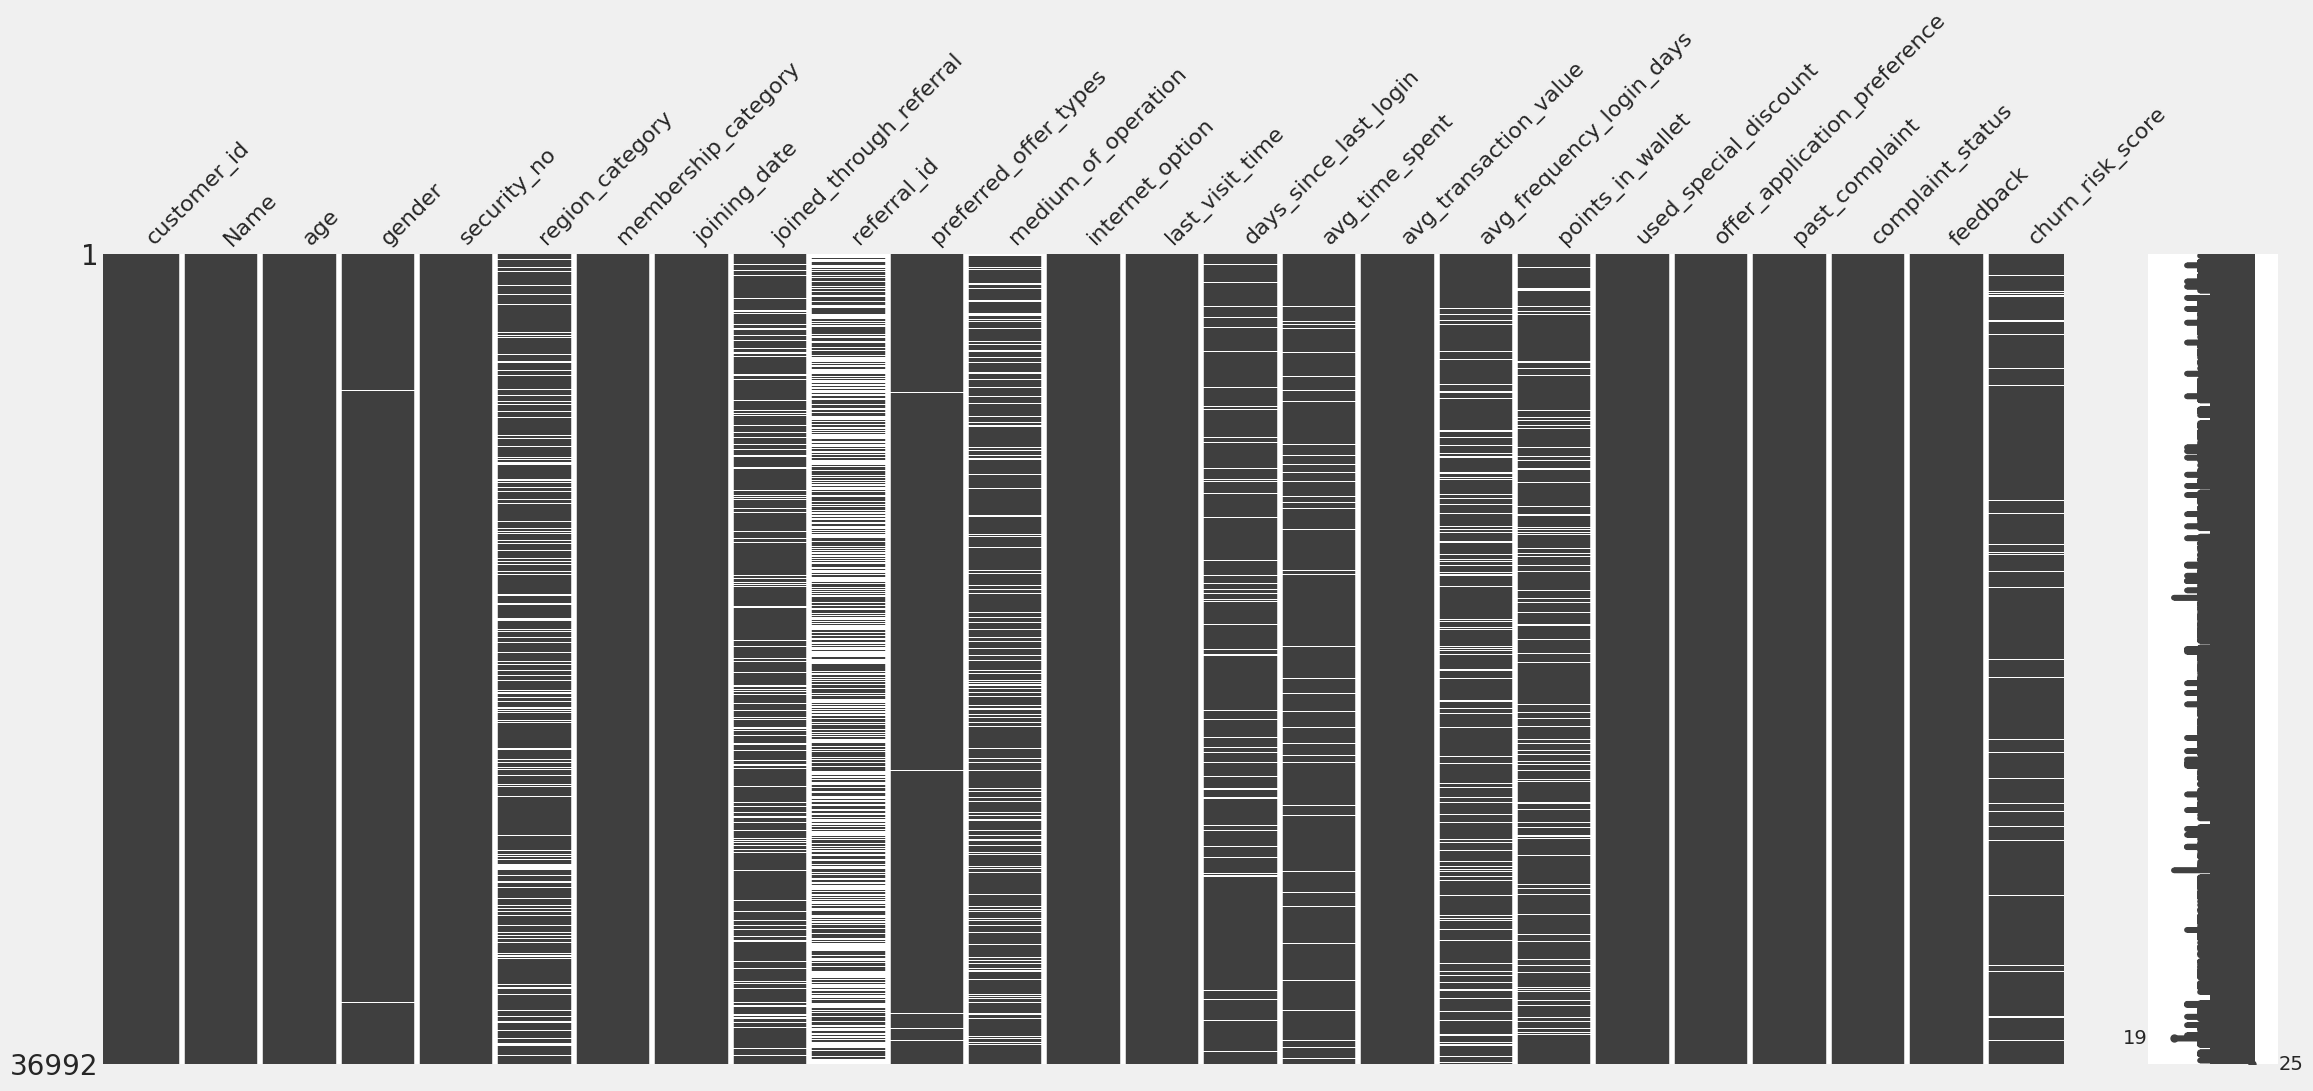

In [43]:
msno.matrix(df_train)

In [44]:
missing_values = pd.DataFrame({
    'missing_values':df_train.isnull().sum(),
    'percentage':df_train.isnull().sum()*100/df_train.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

missing_values  percentage
referral_id                            17846   48.242863
joined_through_referral                 5438   14.700476
region_category                         5428   14.673443
medium_of_operation                     5393   14.578828
avg_frequency_login_days                4205   11.367323
points_in_wallet                        3579    9.675065
days_since_last_login                   1999    5.403871
avg_time_spent                          1719    4.646951
churn_risk_score                        1163    3.143923
preferred_offer_types                    288    0.778547
gender                                    59    0.159494
feedback                                   0    0.000000
complaint_status                           0    0.000000
past_complaint                             0    0.000000
offer_application_preference               0    0.000000
used_special_discount                      0    0.000000
customer_id                                0    0.000000
avg_transaction_value                      0    0.000000
last_visit_time                            0    0.000000
Name                                       0    0.000000
joining_date                               0    0.000000
membership_category                        0    0.000000
security_no                                0    0.000000
age                                        0    0.000000
internet_option                            0    0.000000

## Plot Correlation

In [45]:
df = df_train.copy()

In [46]:
# Convert categorical data to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [47]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df.corr()

# Display the correlation matrix
corr_matrix

customer_id      Name       age    gender  \
customer_id                   1.000000e+00  0.002161  0.007659  0.012369   
Name                          2.161176e-03  1.000000 -0.003393 -0.003170   
age                           7.658611e-03 -0.003393  1.000000  0.000819   
gender                        1.236930e-02 -0.003170  0.000819  1.000000   
security_no                  -5.637285e-03 -0.001334 -0.001097  0.008281   
region_category              -1.056674e-03  0.003064  0.004927  0.000788   
membership_category          -3.077931e-03  0.002668  0.000388  0.003766   
joining_date                  5.394212e-07  0.008074 -0.010499  0.002356   
joined_through_referral      -2.329136e-03  0.006215  0.002141 -0.006272   
referral_id                  -3.086242e-03  0.006216  0.002214  0.006361   
preferred_offer_types        -2.276653e-03 -0.001927 -0.006511  0.000377   
medium_of_operation          -5.659564e-03 -0.004561  0.010494 -0.001286   
internet_option               8.086975e-03 -0.005846  0.011150 -0.004068   
last_visit_time              -5.564020e-03  0.001901 -0.014263  0.005006   
days_since_last_login         5.912421e-03 -0.004399 -0.002017 -0.003643   
avg_time_spent               -3.366954e-04  0.016654 -0.000025 -0.009301   
avg_transaction_value        -4.323842e-03  0.003521 -0.000473  0.003694   
avg_frequency_login_days     -8.207110e-03 -0.000866 -0.000960 -0.001713   
points_in_wallet             -1.397506e-03 -0.000727  0.001861 -0.010196   
used_special_discount        -1.225886e-03  0.000658 -0.005375 -0.000728   
offer_application_preference  1.363083e-03  0.003186  0.003090  0.000333   
past_complaint                1.406080e-03 -0.000490  0.001663 -0.008200   
complaint_status              6.271790e-03 -0.000174  0.003429  0.000301   
feedback                      4.943631e-04 -0.000870 -0.007230 -0.001589   
churn_risk_score             -1.569892e-03 -0.007167  0.002400 -0.003383   

                              security_no  region_category  \
customer_id                     -0.005637        -0.001057   
Name                            -0.001334         0.003064   
age                             -0.001097         0.004927   
gender                           0.008281         0.000788   
security_no                      1.000000        -0.003914   
region_category                 -0.003914         1.000000   
membership_category             -0.011006         0.001438   
joining_date                     0.003191        -0.000096   
joined_through_referral          0.001609         0.002369   
referral_id                      0.002268        -0.001011   
preferred_offer_types            0.007297        -0.004702   
medium_of_operation              0.007798         0.000505   
internet_option                 -0.000551         0.008442   
last_visit_time                  0.000237         0.011871   
days_since_last_login           -0.006031         0.002590   
avg_time_spent                  -0.003920        -0.004287   
avg_transaction_value            0.007594         0.006857   
avg_frequency_login_days         0.001109        -0.011583   
points_in_wallet                -0.005464        -0.004094   
used_special_discount           -0.002057         0.007276   
offer_application_preference    -0.000891        -0.006629   
past_complaint                  -0.008269        -0.006742   
complaint_status                 0.000468        -0.004091   
feedback                         0.011521         0.008708   
churn_risk_score                 0.005811        -0.013665   

                              membership_category  joining_date  \
customer_id                             -0.003078  5.394212e-07   
Name                                     0.002668  8.074432e-03   
age                                      0.000388 -1.049885e-02   
gender                                   0.003766  2.355652e-03   
security_no                             -0.011006  3.191102e-03   
region_category                        

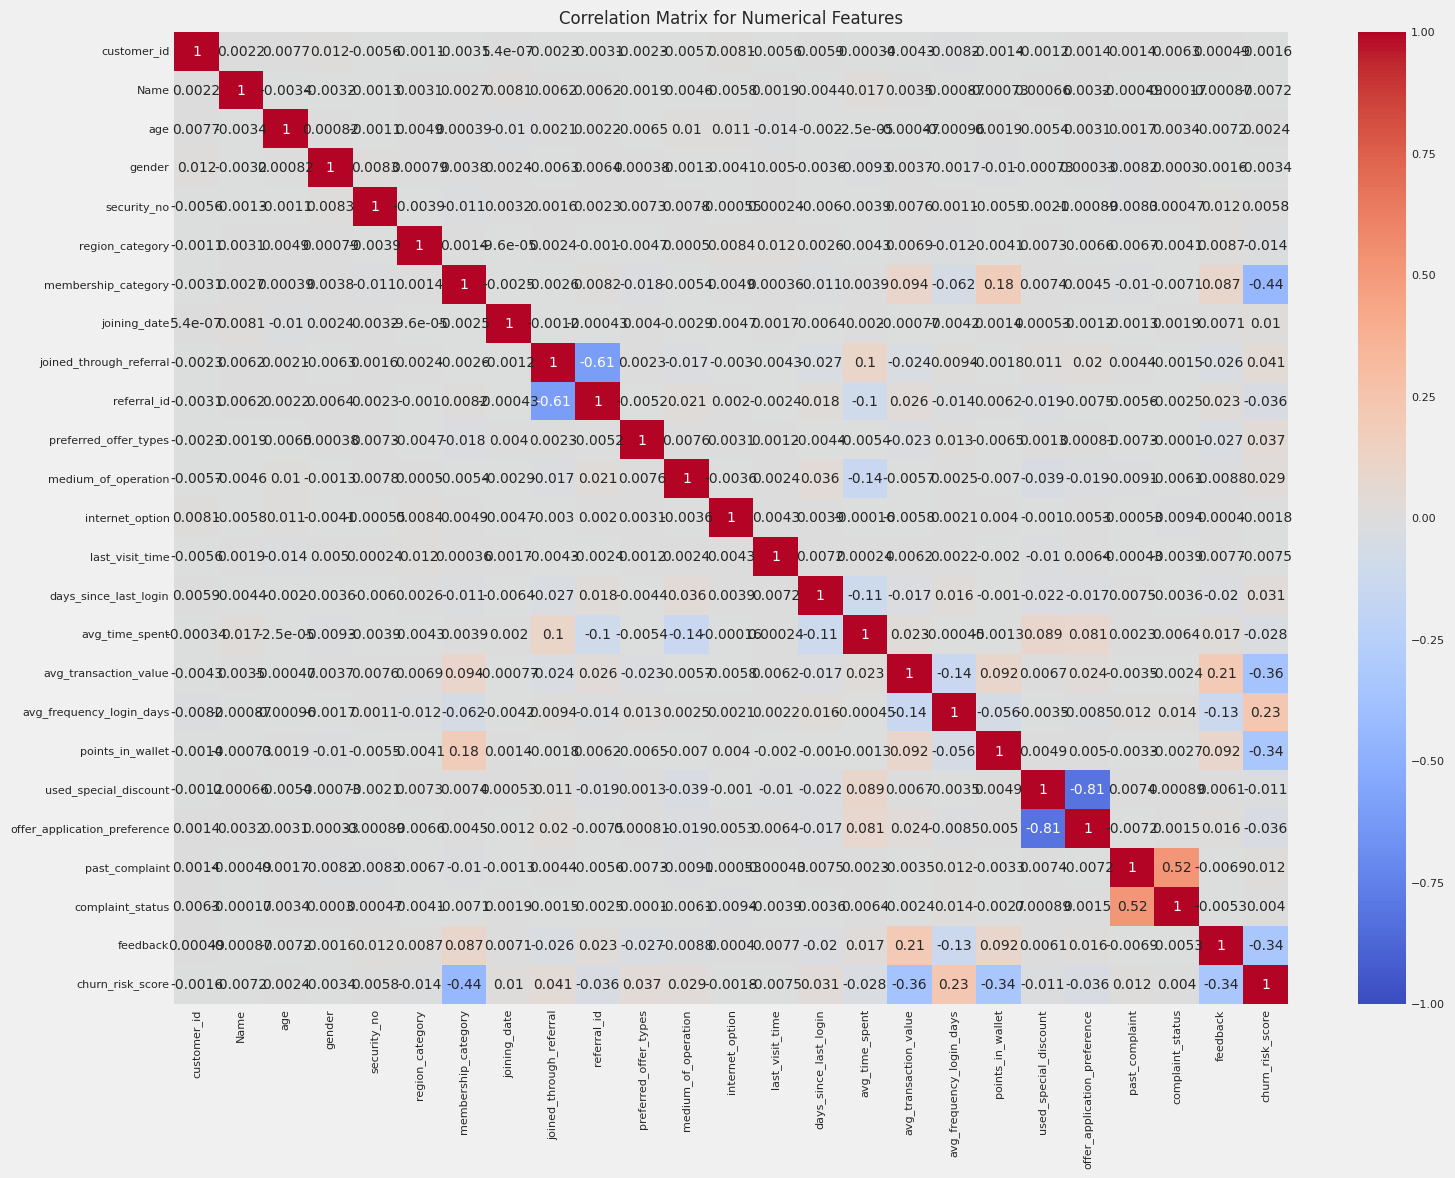

In [48]:
# Plotting the heatmap for numerical correlations
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

> There is no high correlation between independent features and the target column.
<br> But there's -v one between ``membership category, avg transaction value, points in wallet, feedback``



# Task 2- Exploratory Data Analysis (EDA)

## Points in Wallet

In [49]:
df_train['points_in_wallet'].describe()

count    33413.000000
mean       690.354685
std        186.426973
min          6.432208
25%        617.260000
50%        698.250000
75%        764.260000
max       2069.069761
Name: points_in_wallet, dtype: float64

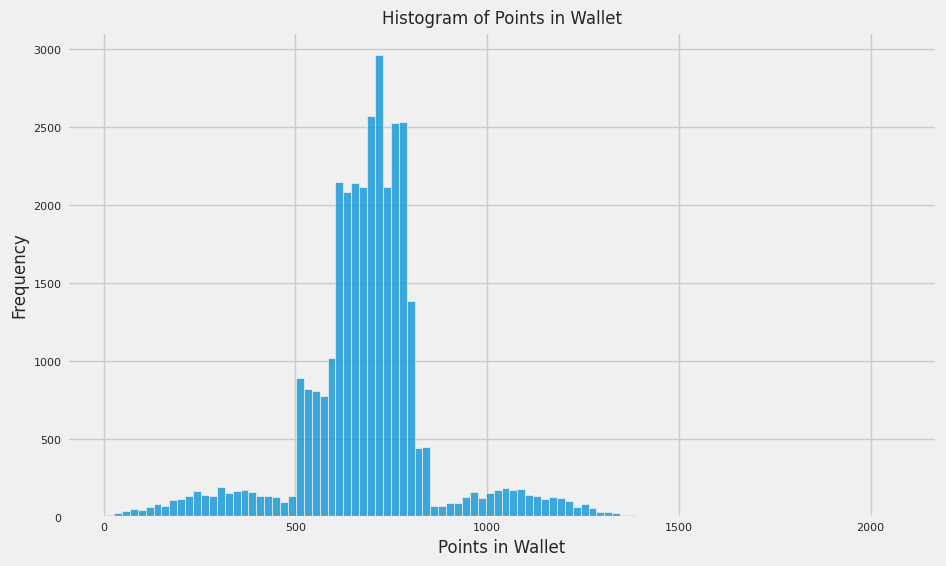

In [50]:
# Histogram of points_in_wallet
plt.figure(figsize=(10, 6))
sns.histplot(df_train['points_in_wallet'], bins=100, kde=False)
plt.title('Histogram of Points in Wallet')
plt.xlabel('Points in Wallet')
plt.ylabel('Frequency')
plt.show()


## Age

In [51]:
df_train['age'].value_counts()

age
33    720
42    716
16    716
38    714
30    711
61    709
60    704
57    704
41    699
59    696
55    695
28    694
34    692
47    691
21    689
32    685
17    683
56    682
29    681
48    680
45    680
46    679
58    678
62    677
22    677
26    675
53    675
52    672
64    672
10    670
14    670
49    669
23    669
36    668
44    661
12    661
19    660
51    660
27    659
43    657
63    656
35    656
50    656
11    654
13    654
37    653
15    649
24    645
39    642
20    641
31    636
25    635
18    629
40    628
54    608
Name: count, dtype: int64

In [52]:
df_train['age'].describe()

count    36992.000000
mean        37.118161
std         15.867412
min         10.000000
25%         23.000000
50%         37.000000
75%         51.000000
max         64.000000
Name: age, dtype: float64

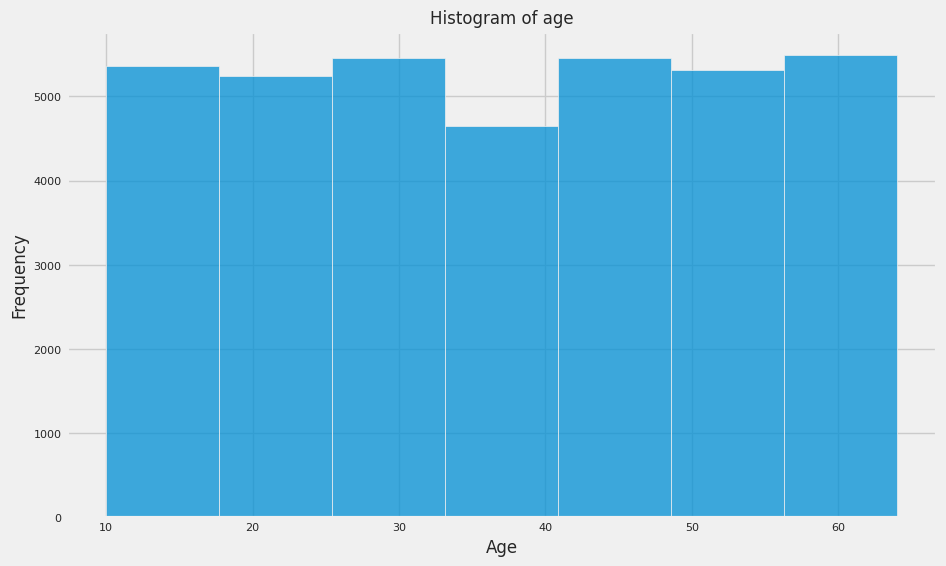

In [53]:
# Histogram of points_in_wallet
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], bins=7, kde=False)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Gender

In [54]:
df_train['gender'].value_counts()

gender
F    18490
M    18443
Name: count, dtype: int64

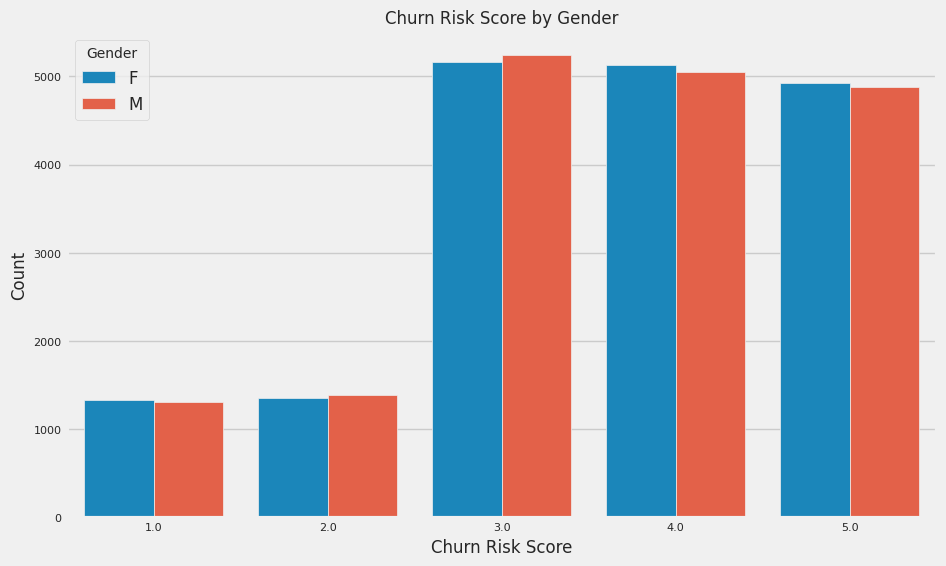

In [55]:
gender_mapping = {
    0: 'Male',
    1: 'Female',
    2: 'Unknown'
}

# Apply the mapping to create a new 'gender_label' column
df_train['gender_label'] = df_train['gender'].map(gender_mapping)

# Stacked bar plot of gender vs churn_risk_score
plt.figure(figsize=(10, 6))
sns.countplot(x='churn_risk_score', hue='gender', data=df_train)
plt.title('Churn Risk Score by Gender')
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


## Checkout rest of the columns

In [56]:
df_train['gender'].value_counts()

gender
F    18490
M    18443
Name: count, dtype: int64

In [57]:
df_train['region_category'].value_counts()

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [58]:
df_train['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [59]:
df_train['feedback'].value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [60]:
df_train['days_since_last_login'].describe()

count    34993.000000
mean        12.758552
std          5.572600
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         26.000000
Name: days_since_last_login, dtype: float64

In [61]:
df_train['last_visit_time'].value_counts()

last_visit_time
07:56:41    6
17:11:53    5
22:31:06    5
02:50:54    5
12:30:02    5
           ..
21:48:50    1
07:53:40    1
00:05:51    1
10:48:11    1
01:39:52    1
Name: count, Length: 30101, dtype: int64

In [62]:
df_train['joining_date'].value_counts()

joining_date
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2016-03-16    19
2016-06-03    18
2015-09-12    18
2017-07-03    18
2015-03-04    16
Name: count, Length: 1096, dtype: int64

In [63]:
df_train['avg_frequency_login_days'].value_counts()

avg_frequency_login_days
13.000000    1394
19.000000    1365
8.000000     1361
14.000000    1355
17.000000    1349
             ... 
46.065501       1
47.095617       1
3.342993        1
29.165844       1
27.839927       1
Name: count, Length: 970, dtype: int64

In [64]:
df_train['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
Name: count, dtype: int64

In [65]:
df_train['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [66]:
df_train['avg_time_spent'].describe()

count    35273.000000
mean       292.751466
std        331.946382
min          1.837399
25%         71.560000
50%        174.180000
75%        371.160000
max       3235.578521
Name: avg_time_spent, dtype: float64

In [67]:
df_train['used_special_discount'].value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [68]:
df_train['past_complaint'].value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [69]:
df_train['complaint_status'].value_counts()

complaint_status
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: count, dtype: int64

In [70]:
df_train['feedback'].value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [71]:
df_train['used_special_discount'].value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

# Task 3- Data Preparation (with Feature Engineering)

## Add Senior column

In [72]:
df_train['senior'] = df_train['age'] >= 50

# Convert 'senior' column to boolean type
df_train['senior'] = df_train['senior'].astype(bool)

## Cast to Categorical & Numerical & DateTime

In [73]:
df_train['days_since_last_login'].value_counts()

days_since_last_login
12.0    2380
13.0    2373
14.0    2307
15.0    2278
11.0    2262
10.0    2091
16.0    2068
9.0     1863
17.0    1747
8.0     1571
18.0    1444
7.0     1442
19.0    1308
6.0     1257
5.0     1234
20.0    1184
21.0    1015
4.0      998
22.0     895
3.0      852
23.0     727
2.0      613
24.0     471
1.0      328
25.0     203
26.0      82
Name: count, dtype: int64

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36933 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       31554 non-null  object 
 9   referral_id                   19146 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           31599 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [75]:
def get_categorical_df(df, cat_columns):
    # Ensure all columns in cat_columns exist in df
    cat_columns = [col for col in cat_columns if col in df.columns]

    # Cast specified columns to categorical
    for col in cat_columns:
        df[col] = df[col].astype('category')

    return cat_columns

In [76]:
def get_numerical_df(df, num_columns):
    # Ensure all columns in num_columns exist in df and are numeric
    num_columns = [col for col in num_columns if col in df.columns]

    # Convert 'Error' to specified error value and cast to numeric
    for col in num_columns:
        df[col] = pd.to_numeric(df[col])

    return num_columns

In [77]:
cat_cols = ['gender', 'region_category', 'membership_category', 'internet_option',
            'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
            'offer_application_preference', 'senior',
            'complaint_status', 'feedback']

num_cols = ['age', 'avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days',
            'points_in_wallet', 'days_since_last_login', 'churn_risk_score']

df_cat = get_categorical_df(df_train, cat_cols)
df_num = get_numerical_df(df_train, num_cols)

print("Categorical DataFrame:")
print(df_cat)

print("Numerical DataFrame:")
print(df_num)

Categorical DataFrame:
['gender', 'region_category', 'membership_category', 'internet_option', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'offer_application_preference', 'senior', 'complaint_status', 'feedback']
Numerical DataFrame:
['age', 'avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'churn_risk_score']


In [78]:
df_train['joining_date'] = pd.to_datetime(df_train['joining_date'])
df_train['last_visit_time'] = pd.to_datetime(df_train['last_visit_time'])


df_train['past_complaint'] = df_train['past_complaint'].map({'Yes': True, 'No': False})
df_train['past_complaint'] = df_train['past_complaint'].astype('bool')


df_train['used_special_discount'] = df_train['used_special_discount'].map({'Yes': True, 'No': False})
df_train['used_special_discount'] = df_train['used_special_discount'].astype('bool')

In [79]:
df_train.shape

(36992, 27)

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36933 non-null  category      
 4   security_no                   36992 non-null  object        
 5   region_category               31564 non-null  category      
 6   membership_category           36992 non-null  category      
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       31554 non-null  category      
 9   referral_id                   19146 non-null  object        
 10  preferred_offer_types         36704 non-null  category      
 11  medium_of_operation         

In [81]:
df_train['used_special_discount'].value_counts()

used_special_discount
True     20342
False    16650
Name: count, dtype: int64

In [82]:
df_train['past_complaint'].value_counts()

past_complaint
False    18602
True     18390
Name: count, dtype: int64

## Name & Gender

In [83]:
df_train['Name'].isna().sum()

0

In [84]:
df_train['Name'].value_counts()

Name
Pattie Morrisey     1
Brandon Casiano     1
Merideth Gebo       1
Neville Goodwill    1
Sol Siemers         1
                   ..
Gina Hintzen        1
Kizzy Ramos         1
Earlie Spalla       1
Vinnie Talley       1
Verlene Beaulieu    1
Name: count, Length: 36992, dtype: int64

In [85]:
df_train['gender'].value_counts()

gender
F    18490
M    18443
Name: count, dtype: int64

In [86]:
df_train['gender'].isna().sum()

59

In [87]:
df_train['First Name'] = df_train['Name'].apply(lambda x: x.split()[0])

In [88]:
mode_per_name = df_train.groupby('First Name')['gender'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
df_train['First Name'].value_counts()

First Name
Sidney      137
Gilda       126
Noe         123
Selena      123
Karri       121
           ... 
Sun           1
Patience      1
Lakeesha      1
Odette        1
Robbyn        1
Name: count, Length: 638, dtype: int64

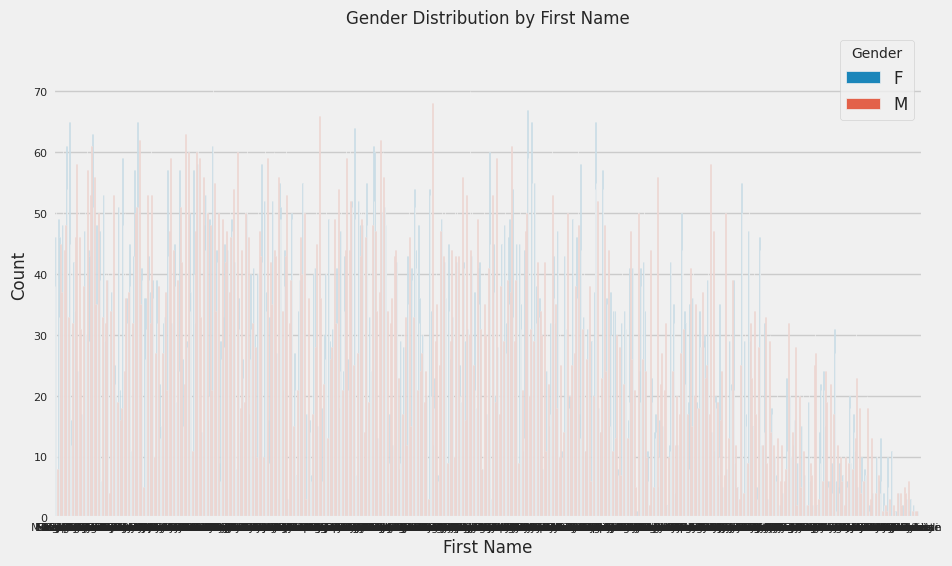

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='First Name', hue='gender')
plt.title('Gender Distribution by First Name')
plt.xlabel('First Name')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

## Fill NAN

### Categorical

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36933 non-null  category      
 4   security_no                   36992 non-null  object        
 5   region_category               31564 non-null  category      
 6   membership_category           36992 non-null  category      
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       31554 non-null  category      
 9   referral_id                   19146 non-null  object        
 10  preferred_offer_types         36704 non-null  category      
 11  medium_of_operation         

In [91]:
df_train['gender'] = df_train.apply(lambda row: mode_per_name[row['First Name']] if pd.isnull(row['gender']) else row['gender'], axis=1)

In [92]:
df_cat = df_train.select_dtypes(include=['object', 'bool', 'category'])

In [93]:
df_cat.columns.values

array(['customer_id', 'Name', 'gender', 'security_no', 'region_category',
       'membership_category', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'gender_label',
       'senior', 'First Name'], dtype=object)

In [94]:
Missing_cat = df_train[['preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]

In [95]:
for i,col in enumerate(Missing_cat):
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

### Numerical

In [96]:
df_num = df_train.select_dtypes(include=np.number)

In [97]:
Missing_num = df_train[['points_in_wallet','avg_time_spent','days_since_last_login','avg_frequency_login_days']]

In [98]:
imputer = KNNImputer(n_neighbors=3)
imputed_value=imputer.fit_transform(Missing_num)



> After experimenting with other imputation methods such as mean & median and we got better results with KNNimputer.



## Add Joining Day & Month & Week Column

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  object        
 4   security_no                   36992 non-null  object        
 5   region_category               36992 non-null  category      
 6   membership_category           36992 non-null  category      
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  category      
 9   referral_id                   19146 non-null  object        
 10  preferred_offer_types         36992 non-null  category      
 11  medium_of_operation         

In [100]:
df_train['joining_day'] = df_train['joining_date'].dt.day
df_train['joining_month'] = df_train['joining_date'].dt.month
df_train['joining_week'] = df_train['joining_date'].dt.dayofweek
df_train['joining_year'] = df_train['joining_date'].dt.year

In [101]:
df_train[['last_visit_time', 'joining_date']]

last_visit_time joining_date
0     2024-06-20 16:08:02   2017-08-17
1     2024-06-20 12:38:13   2017-08-28
2     2024-06-20 22:53:21   2016-11-11
3     2024-06-20 15:57:50   2016-10-29
4     2024-06-20 15:46:44   2017-09-12
...                   ...          ...
36987 2024-06-20 04:14:05   2017-09-21
36988 2024-06-20 23:18:31   2016-06-27
36989 2024-06-20 03:50:25   2016-09-11
36990 2024-06-20 09:50:03   2017-06-15
36991 2024-06-20 01:39:52   2015-10-23

[36992 rows x 2 columns]

In [102]:
df_train['days_of_use'] = (df_train['last_visit_time'] - df_train['joining_date']).dt.days

In [103]:
df_train['days_of_use'].value_counts()

days_of_use
3306    55
3274    51
3287    50
3282    49
2878    49
        ..
3018    19
2939    18
3204    18
2544    18
3396    16
Name: count, Length: 1096, dtype: int64

## Drop Unnecessary Columns

In [104]:
df_train.drop(['Name', 'First Name', 'gender_label', 'customer_id','security_no','referral_id','joining_date','last_visit_time', 'days_of_use'], axis=1, inplace=True)

## Duplicate?

In [105]:
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [age, gender, region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, internet_option, days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, points_in_wallet, used_special_discount, offer_application_preference, past_complaint, complaint_status, feedback, churn_risk_score, senior, joining_day, joining_month, joining_week, joining_year]
Index: []

[0 rows x 24 columns]

## Outliers

### Visualize them

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           36992 non-null  int64   
 1   gender                        36992 non-null  object  
 2   region_category               36992 non-null  category
 3   membership_category           36992 non-null  category
 4   joined_through_referral       36992 non-null  category
 5   preferred_offer_types         36992 non-null  category
 6   medium_of_operation           36992 non-null  category
 7   internet_option               36992 non-null  category
 8   days_since_last_login         34993 non-null  float64 
 9   avg_time_spent                35273 non-null  float64 
 10  avg_transaction_value         36992 non-null  float64 
 11  avg_frequency_login_days      32787 non-null  float64 
 12  points_in_wallet              33413 non-null  

In [107]:
df_train.columns.values

array(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback',
       'churn_risk_score', 'senior', 'joining_day', 'joining_month',
       'joining_week', 'joining_year'], dtype=object)

In [108]:
df_num = df_train.select_dtypes(include=[np.number])

In [109]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column days_since_last_login are 0
Total number of Outliers in column avg_time_spent are 2981
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column avg_frequency_login_days are 334
Total number of Outliers in column points_in_wallet are 4246
Total number of Outliers in column churn_risk_score are 0
Total number of Outliers in column joining_day are 0
Total number of Outliers in column joining_month are 0
Total number of Outliers in column joining_week are 0
Total number of Outliers in column joining_year are 0


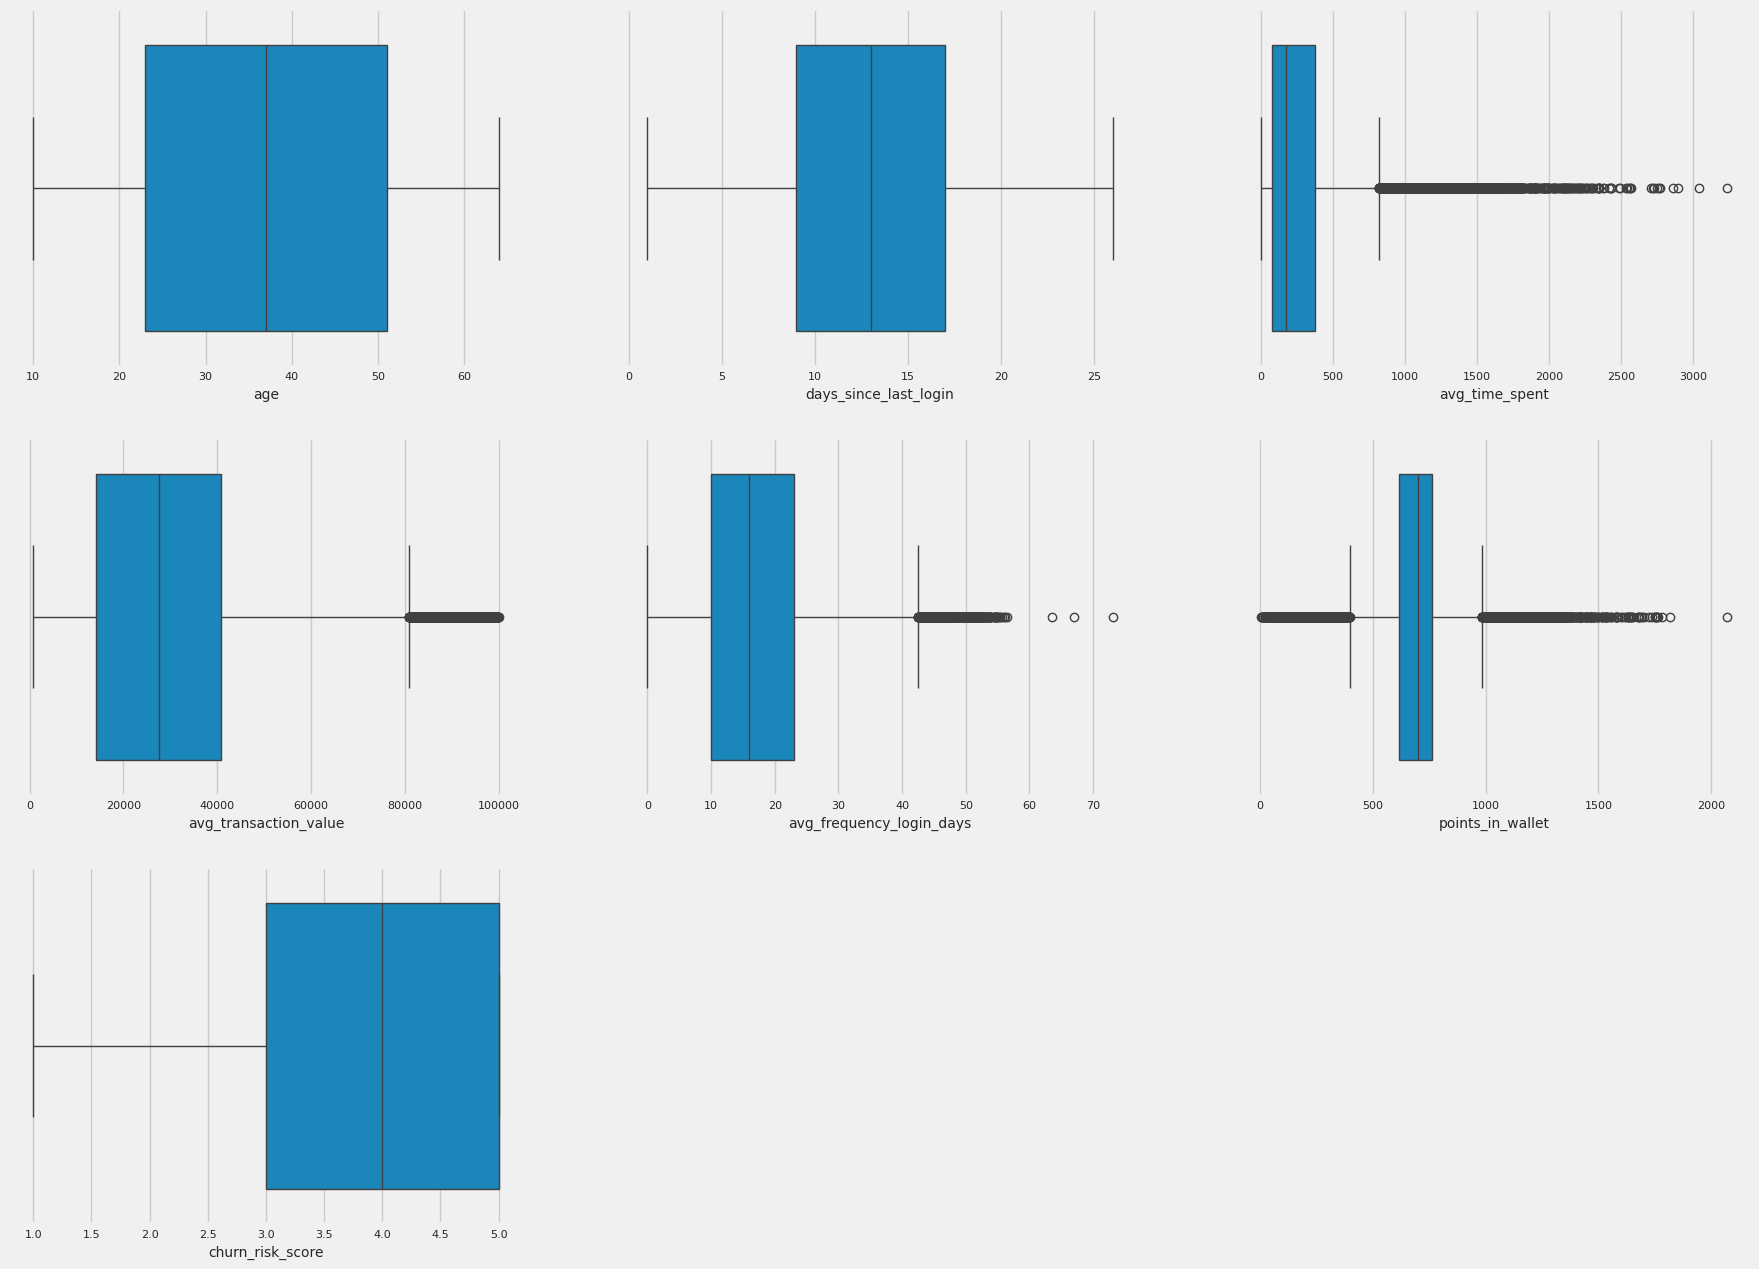

In [110]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20, 15))
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()



> - Features such as `age`, `day_since_last_login` have no outliers
-  all others are having outliers in large numbers



### Remove Them

In [111]:
# Filter out outliers from df_train based on numeric columns in df_num
df_train = df_train[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset index and drop the old index column
df_train.reset_index(drop=True, inplace=True)

df_train.shape

(28920, 24)

In [112]:
df_cat = df_train[['gender','region_category','joined_through_referral',
                   'preferred_offer_types','medium_of_operation','internet_option',
                   'used_special_discount','offer_application_preference','past_complaint']]

df_num = df_train.select_dtypes(include=np.number)

## Encoding

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28920 entries, 0 to 28919
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           28920 non-null  int64   
 1   gender                        28920 non-null  object  
 2   region_category               28920 non-null  category
 3   membership_category           28920 non-null  category
 4   joined_through_referral       28920 non-null  category
 5   preferred_offer_types         28920 non-null  category
 6   medium_of_operation           28920 non-null  category
 7   internet_option               28920 non-null  category
 8   days_since_last_login         27359 non-null  float64 
 9   avg_time_spent                27454 non-null  float64 
 10  avg_transaction_value         28920 non-null  float64 
 11  avg_frequency_login_days      25598 non-null  float64 
 12  points_in_wallet              25775 non-null  

### Ordinal

#### membership_category

In [114]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership",
                                                                  "Gold Membership","Platinum Membership","Premium Membership"]])


df_train['membership_category'] = orderencoding_membership_category.fit_transform(df_train['membership_category'].values.reshape(-1,1))


#### complaint_status

In [115]:
orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable",
                                                               "Unsolved","Solved","Solved in Follow-up"]])


df_train['complaint_status'] = orderencoding_complaint_status.fit_transform(df_train['complaint_status'].values.reshape(-1,1))

### Label

#### Feedback

In [116]:
labelencoder_feedback = LabelEncoder()
df_train['feedback'] = labelencoder_feedback.fit_transform(df_train.feedback)

### One Hot Encoder

In [117]:
df_cat = df_train.select_dtypes(include=['object', 'bool', 'category'])

In [118]:
df_cat.columns.values

array(['gender', 'region_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'senior'], dtype=object)

In [119]:
df_categorical = pd.get_dummies(df_cat, drop_first=True)

In [120]:
df_categorical.columns.values

array(['used_special_discount', 'past_complaint', 'gender_M',
       'region_category_Town', 'region_category_Village',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'offer_application_preference_Yes', 'senior_True'], dtype=object)

### Concat

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28920 entries, 0 to 28919
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           28920 non-null  int64   
 1   gender                        28920 non-null  object  
 2   region_category               28920 non-null  category
 3   membership_category           28920 non-null  float64 
 4   joined_through_referral       28920 non-null  category
 5   preferred_offer_types         28920 non-null  category
 6   medium_of_operation           28920 non-null  category
 7   internet_option               28920 non-null  category
 8   days_since_last_login         27359 non-null  float64 
 9   avg_time_spent                27454 non-null  float64 
 10  avg_transaction_value         28920 non-null  float64 
 11  avg_frequency_login_days      25598 non-null  float64 
 12  points_in_wallet              25775 non-null  

In [122]:
df_train = pd.concat([df_categorical, df_num, df_train['membership_category'], df_train['complaint_status'], df_train['feedback']], axis=1)

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28920 entries, 0 to 28919
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   used_special_discount                        28920 non-null  bool   
 1   past_complaint                               28920 non-null  bool   
 2   gender_M                                     28920 non-null  bool   
 3   region_category_Town                         28920 non-null  bool   
 4   region_category_Village                      28920 non-null  bool   
 5   joined_through_referral_Yes                  28920 non-null  bool   
 6   preferred_offer_types_Gift Vouchers/Coupons  28920 non-null  bool   
 7   preferred_offer_types_Without Offers         28920 non-null  bool   
 8   medium_of_operation_Desktop                  28920 non-null  bool   
 9   medium_of_operation_Smartphone               28920 non-null  bool   
 10

## Scaling

In [124]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28920 entries, 0 to 28919
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   used_special_discount                        28920 non-null  bool   
 1   past_complaint                               28920 non-null  bool   
 2   gender_M                                     28920 non-null  bool   
 3   region_category_Town                         28920 non-null  bool   
 4   region_category_Village                      28920 non-null  bool   
 5   joined_through_referral_Yes                  28920 non-null  bool   
 6   preferred_offer_types_Gift Vouchers/Coupons  28920 non-null  bool   
 7   preferred_offer_types_Without Offers         28920 non-null  bool   
 8   medium_of_operation_Desktop                  28920 non-null  bool   
 9   medium_of_operation_Smartphone               28920 non-null  bool   
 10

In [125]:
col = df_train[['age','days_since_last_login','avg_time_spent',
                'avg_transaction_value','avg_frequency_login_days','points_in_wallet']]

In [126]:
df_train.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'], axis=1, inplace=True)

In [127]:
standard_scale = StandardScaler()
col1 = standard_scale.fit_transform(col)
df_scaled = pd.DataFrame(col1, columns=col.columns)
df_scaled.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0 -1.209998               0.739836        0.494213               1.567573   
1 -0.326643               0.560312        0.525572              -0.882826   
2  0.430517               0.201263        1.677878              -0.383276   
3 -0.011160              -0.337309       -0.864258              -0.126286   
4 -0.389740               1.278408       -0.535514              -0.172400   

   avg_frequency_login_days  points_in_wallet  
0                  0.081979          1.033172  
1                 -0.821310               NaN  
2                  0.727186         -1.970031  
3                 -1.337476         -1.254438  
4                 -0.047062         -0.235063

In [128]:
df_train = pd.concat([df_train, df_scaled], axis=1 )
df_train.head()

used_special_discount  past_complaint  gender_M  region_category_Town  \
0                   True           False     False                 False   
1                   True            True     False                 False   
2                  False            True     False                  True   
3                  False            True      True                 False   
4                  False            True     False                 False   

   region_category_Village  joined_through_referral_Yes  \
0                     True                        False   
1                    False                        False   
2                    False                         True   
3                    False                         True   
4                    False                        False   

   preferred_offer_types_Gift Vouchers/Coupons  \
0                                         True   
1                                         True   
2                                         True   
3                                         True   
4                                        False   

   preferred_offer_types_Without Offers  medium_of_operation_Desktop  \
0                                 False                         True   
1                                 False                         True   
2                                 False                         True   
3                                 False                         True   
4                                 False                        False   

   medium_of_operation_Smartphone  ...  joining_year  membership_category  \
0                           False  ...          2017                  4.0   
1                           False  ...          2017                  5.0   
2                           False  ...          2016                  0.0   
3                           False  ...          2016                  0.0   
4                            True  ...          2017                  0.0   

   complaint_status  feedback       age  days_since_last_login  \
0               1.0         4 -1.209998               0.739836   
1               3.0         5 -0.326643               0.560312   
2               4.0         3  0.430517               0.201263   
3               2.0         3 -0.011160              -0.337309   
4               3.0         3 -0.389740               1.278408   

   avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
0        0.494213               1.567573                  0.081979   
1        0.525572              -0.882826                 -0.821310   
2        1.677878              -0.383276                  0.727186   
3       -0.864258              -0.126286                 -1.337476   
4       -0.535514              -0.172400                 -0.047062   

   points_in_wallet  
0          1.033172  
1               NaN  
2         -1.970031  
3         -1.254438  
4         -0.235063  

[5 rows x 28 columns]

## OverSampling



> Clearly target labels are imbalanced. So we'll use Over sampling techinques




In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28920 entries, 0 to 28919
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   used_special_discount                        28920 non-null  bool   
 1   past_complaint                               28920 non-null  bool   
 2   gender_M                                     28920 non-null  bool   
 3   region_category_Town                         28920 non-null  bool   
 4   region_category_Village                      28920 non-null  bool   
 5   joined_through_referral_Yes                  28920 non-null  bool   
 6   preferred_offer_types_Gift Vouchers/Coupons  28920 non-null  bool   
 7   preferred_offer_types_Without Offers         28920 non-null  bool   
 8   medium_of_operation_Desktop                  28920 non-null  bool   
 9   medium_of_operation_Smartphone               28920 non-null  bool   
 10

In [130]:
df_train['churn_risk_score'].value_counts()

churn_risk_score
3.0    8448
4.0    8106
5.0    7987
2.0    1769
1.0    1681
Name: count, dtype: int64

In [131]:
df_train.isna().sum()

used_special_discount                             0
past_complaint                                    0
gender_M                                          0
region_category_Town                              0
region_category_Village                           0
joined_through_referral_Yes                       0
preferred_offer_types_Gift Vouchers/Coupons       0
preferred_offer_types_Without Offers              0
medium_of_operation_Desktop                       0
medium_of_operation_Smartphone                    0
internet_option_Mobile_Data                       0
internet_option_Wi-Fi                             0
offer_application_preference_Yes                  0
senior_True                                       0
churn_risk_score                                929
joining_day                                       0
joining_month                                     0
joining_week                                      0
joining_year                                      0
membership_c

In [132]:
df_train.shape

(28920, 28)

In [133]:
df_train.dropna(axis=0,how='any',inplace=True)

In [134]:
df_train.shape

(19840, 28)

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19840 entries, 0 to 28915
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   used_special_discount                        19840 non-null  bool   
 1   past_complaint                               19840 non-null  bool   
 2   gender_M                                     19840 non-null  bool   
 3   region_category_Town                         19840 non-null  bool   
 4   region_category_Village                      19840 non-null  bool   
 5   joined_through_referral_Yes                  19840 non-null  bool   
 6   preferred_offer_types_Gift Vouchers/Coupons  19840 non-null  bool   
 7   preferred_offer_types_Without Offers         19840 non-null  bool   
 8   medium_of_operation_Desktop                  19840 non-null  bool   
 9   medium_of_operation_Smartphone               19840 non-null  bool   
 10  int

In [136]:
df_train.columns

Index(['used_special_discount', 'past_complaint', 'gender_M',
       'region_category_Town', 'region_category_Village',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'offer_application_preference_Yes',
       'senior_True', 'churn_risk_score', 'joining_day', 'joining_month',
       'joining_week', 'joining_year', 'membership_category',
       'complaint_status', 'feedback', 'age', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet'],
      dtype='object')

In [137]:
X = df_train.drop(['churn_risk_score'],axis=1).values
Y = df_train['churn_risk_score'].values

In [138]:
# Applying SMOTE Over Sampling Strategy
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_ov,Y_ov = oversampler.fit_resample(X,Y)
print('The dataset before oversampling: ',X.shape,Y.shape)
print('The dataset after oversampling: ',X_ov.shape,Y_ov.shape)

The dataset before oversampling:  (19840, 27) (19840,)
The dataset after oversampling:  (30085, 27) (30085,)


In [139]:
# Now we are having equally balanced target labels
print(sum(Y == 1),sum(Y_ov == 1))
print(sum(Y == 2),sum(Y_ov == 2))
print(sum(Y == 3),sum(Y_ov == 3))
print(sum(Y == 4),sum(Y_ov == 4))
print(sum(Y == 5),sum(Y_ov == 5))


1195 6017
1270 6017
6017 6017
5732 6017
5626 6017


# Task 4- Data Modelling

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X_ov, Y_ov, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24068, 27) (24068,)
(6017, 27) (6017,)


## Random Forest Classifier

In [141]:
K.clear_session()
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [142]:
df_train.drop(['churn_risk_score'],axis=1).columns.values

array(['used_special_discount', 'past_complaint', 'gender_M',
       'region_category_Town', 'region_category_Village',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'offer_application_preference_Yes', 'senior_True', 'joining_day',
       'joining_month', 'joining_week', 'joining_year',
       'membership_category', 'complaint_status', 'feedback', 'age',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet'], dtype=object)

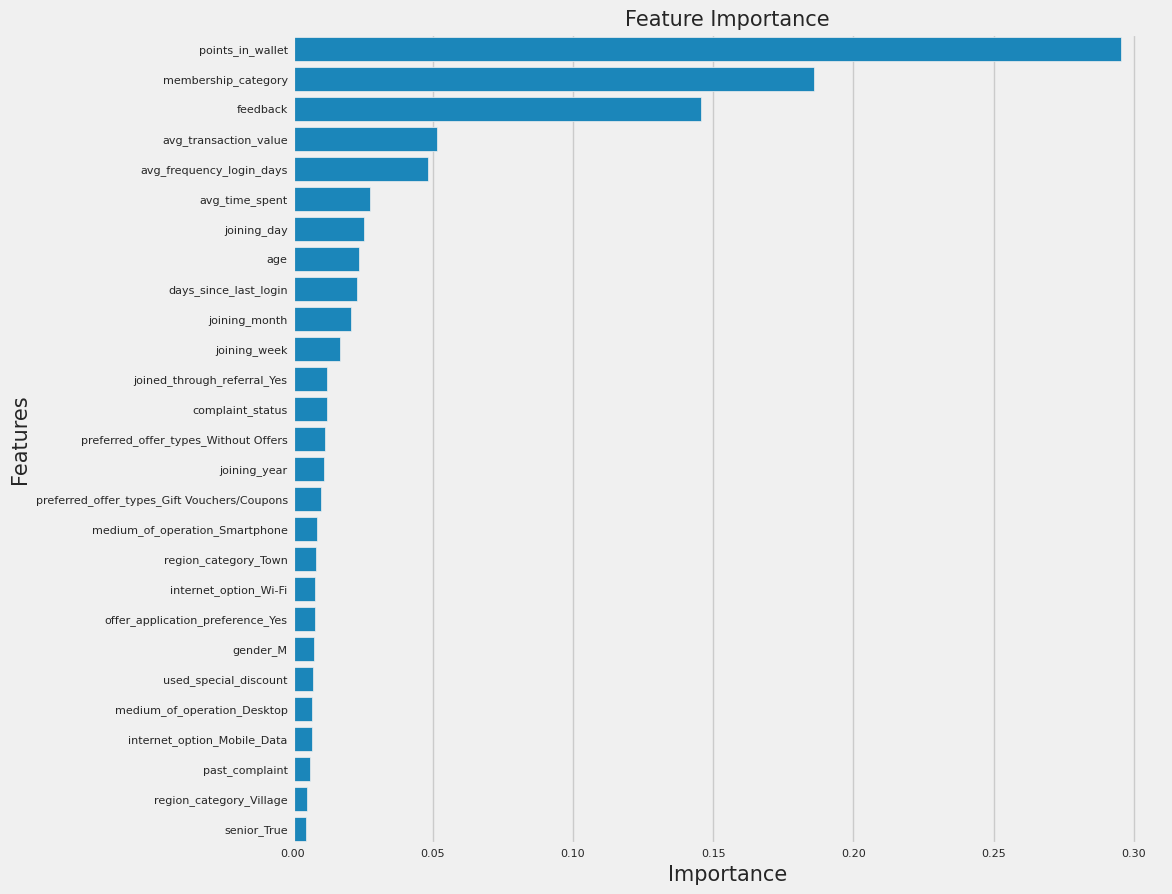

In [143]:
important_features = pd.DataFrame({'Features': df_train.drop(['churn_risk_score'],axis=1).columns.values,
                                   'Importance': rf.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [144]:
y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95      1187
         2.0       0.96      0.96      0.96      1250
         3.0       0.90      0.98      0.94      1195
         4.0       0.80      0.62      0.70      1203
         5.0       0.75      0.86      0.80      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.870077388094117


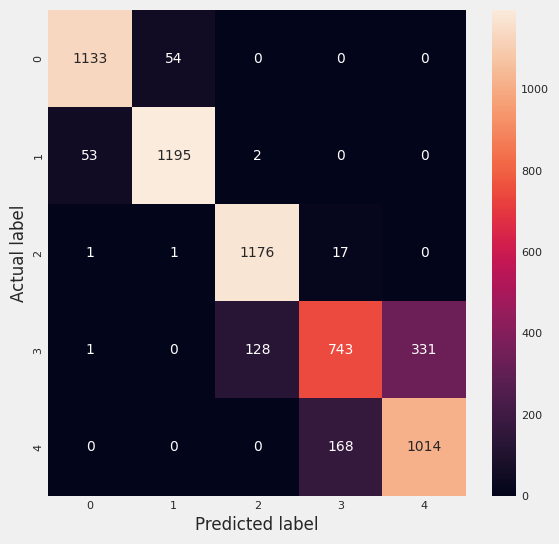

In [145]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## MLPClassifier with three hidden layers of 100 nodes each

In [146]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100))
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.82      0.85      0.83      1187
         2.0       0.82      0.76      0.79      1250
         3.0       0.81      0.89      0.85      1195
         4.0       0.77      0.66      0.71      1203
         5.0       0.76      0.82      0.79      1182

    accuracy                           0.80      6017
   macro avg       0.80      0.80      0.79      6017
weighted avg       0.80      0.80      0.79      6017

0.7945562769099597


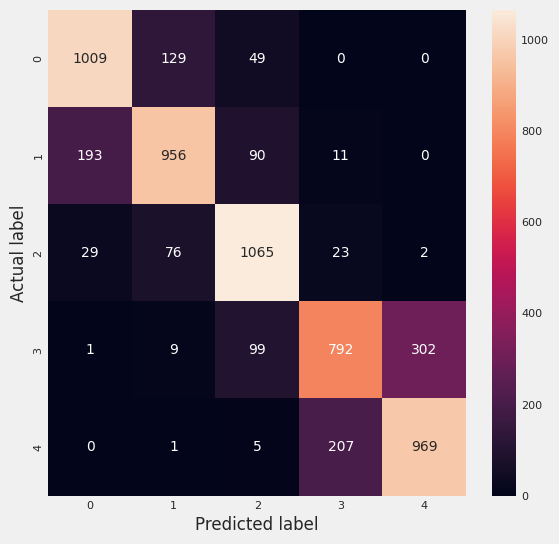

In [147]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=15, min_samples_split=10, min_samples_leaf=12)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.87      0.87      0.87      1187
         2.0       0.88      0.88      0.88      1250
         3.0       0.94      0.95      0.95      1195
         4.0       0.77      0.67      0.71      1203
         5.0       0.75      0.84      0.79      1182

    accuracy                           0.84      6017
   macro avg       0.84      0.84      0.84      6017
weighted avg       0.84      0.84      0.84      6017

0.8403430491220142


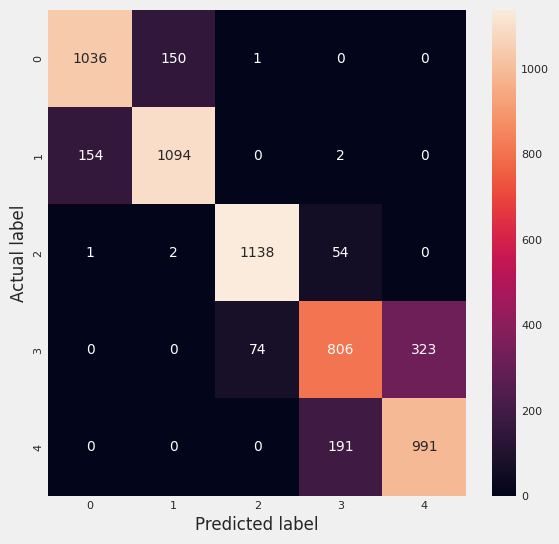

In [149]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## Gradient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=10,min_samples_leaf = 4, min_samples_split= 5)
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96      1187
         2.0       0.97      0.96      0.97      1250
         3.0       0.94      0.96      0.95      1195
         4.0       0.77      0.69      0.73      1203
         5.0       0.77      0.83      0.80      1182

    accuracy                           0.88      6017
   macro avg       0.88      0.88      0.88      6017
weighted avg       0.88      0.88      0.88      6017

0.8804183604187609


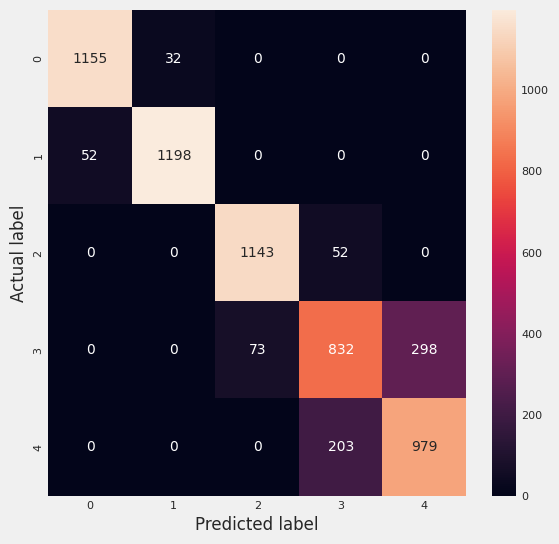

In [151]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## XGBClassifier

In [152]:
xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,max_depth=10)

y_train_adj = y_train - 1
y_test_adj = y_test - 1

xgb.fit(X_train, y_train_adj)

y_pred_adj = xgb.predict(X_test)
y_pred = y_pred_adj + 1

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      1187
         2.0       0.98      0.98      0.98      1250
         3.0       0.94      0.96      0.95      1195
         4.0       0.76      0.73      0.74      1203
         5.0       0.79      0.80      0.79      1182

    accuracy                           0.89      6017
   macro avg       0.89      0.89      0.89      6017
weighted avg       0.89      0.89      0.89      6017

0.8887661085187293


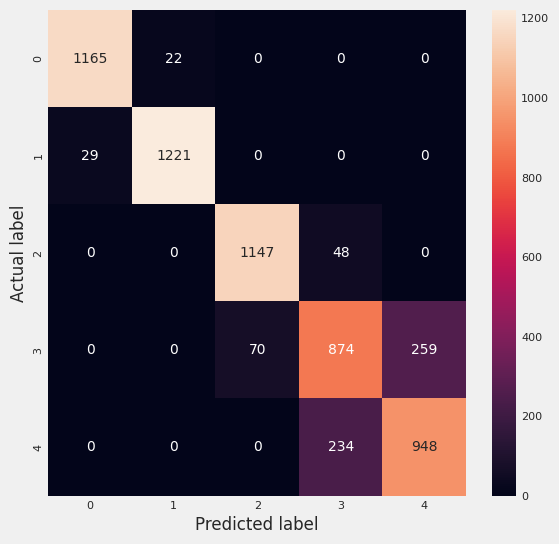

In [153]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## KNN

In [154]:
# List of k values to evaluate
k_values = [1, 3, 5, 7, 9, 11, 15, 20, 25, 30]

# Cross-validation to find the best k
best_k = None
best_score = -1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed

    avg_score = scores.mean()

    if avg_score > best_score:
        best_score = avg_score
        best_k = k

print(f"Best k: {best_k} with cross-validation accuracy score: {best_score:.2f}")


Best k: 1 with cross-validation accuracy score: 0.74


In [155]:
# Train the best kNN model on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_knn.predict(X_test)

# Print classification report and other metrics
print(classification_report(y_test, y_pred))
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.2f}")


              precision    recall  f1-score   support

         1.0       0.93      1.00      0.96      1187
         2.0       0.90      1.00      0.95      1250
         3.0       0.71      0.59      0.64      1195
         4.0       0.49      0.45      0.47      1203
         5.0       0.65      0.68      0.67      1182

    accuracy                           0.75      6017
   macro avg       0.74      0.74      0.74      6017
weighted avg       0.74      0.75      0.74      6017

F1-score (macro): 0.74


## Mixed model of XGB ,Random Forest & Gradient Boosting Classifier

In [158]:
class MixModel(skb.BaseEstimator, skb.RegressorMixin, skb.TransformerMixin):

    def __init__(self, algs):
        self.algs = algs

    def fit(self, X, y):
        self.algs_ = [skb.clone(x) for x in self.algs]


        for alg in self.algs_:
            alg.fit(X, y)

        return self


    def predict(self, X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return (np.mean(predictions, axis=1)).astype('int64')

In [159]:
mixed_model = MixModel(algs = [xgb, rf, gbrt])
mixed_model.fit(X_train, y_train_adj)

MixModel(algs=[XGBClassifier(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance_type=None, interaction_constraints=None,
                             learning_rate=None, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=10, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, multi_strategy=None,
                             n_estimators=1000, n_jobs=-1,
                             num_parallel_tree=None, objective='multi:softprob', ...),
               RandomForestClassifier(random_state=0),
               GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                                          min_samples_split=5)])

In [160]:
y_pred_adj = mixed_model.predict(X_test)
y_pred = y_pred_adj + 1

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


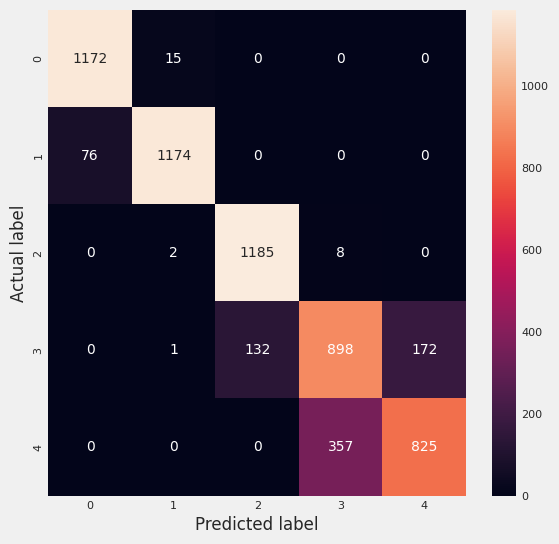

In [179]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

# Grid Search

## Kfold Cross Validation

In [197]:
def kfcv(model , x , y):
    if isinstance(model, XGBClassifier):
        y = y_train - 1
    accuracies = cross_val_score(estimator = model, X = x, y = y, cv = 10, n_jobs = -1)
    return accuracies

In [181]:
lr_kf  = LogisticRegression(random_state=0, penalty = 'l2')
nb_kf  = GaussianNB()

In [182]:
accuracies = kfcv(lr_kf, X_train, y_train)
print(f'Logistic Regression: \n Mean Accuracy {accuracies.mean()} \n Minimum Accuracy {accuracies.min()} \n Maximum Accuracy {accuracies.max()} \n Accuracies: {accuracies}')

Logistic Regression: 
 Mean Accuracy 0.5814758561289617 
 Minimum Accuracy 0.5490440565253533 
 Maximum Accuracy 0.6057332779393436 
 Accuracies: [0.56875779 0.59243872 0.58163689 0.58205235 0.60573328 0.57498961
 0.58496053 0.60033236 0.54904406 0.57481297]


In [183]:
accuracies1 = kfcv(nb_kf, X_train, y_train)
print(f'Naive Bayes : \n Mean Accuracy {accuracies1.mean()} \n Minimum Accuracy {accuracies1.min()} \n Maximum Accuracy {accuracies1.max()} \n Accuracies: {accuracies1}')

Naive Bayes : 
 Mean Accuracy 0.6964005648529279 
 Minimum Accuracy 0.6753948462177889 
 Maximum Accuracy 0.7108433734939759 
 Accuracies: [0.705027   0.69422518 0.68550062 0.69837973 0.70294973 0.70461155
 0.70087246 0.71084337 0.67539485 0.68620116]


In [184]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model,
                         param_grid = param,
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    # print("Booster?" , isinstance(model, XGBClassifier))
    if isinstance(model, XGBClassifier):
      y_train_adj = y_train - 1
      gscv.fit(X_train, y_train_adj)

    else:
      gscv.fit(X_train , y_train)

    result = gscv.best_params_
    return result

## KNN

In [185]:
"""
knn_gs = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(knn_gs , knn_params)
print(f'Best parameters for KNN: {r2}')
"""
# Best parameters for KNN: {'n_neighbors': 5}

"\nknn_gs = KNeighborsClassifier()\nknn_params ={'n_neighbors':[3,5,7,9,11]}\nr2 = gridsearch(knn_gs , knn_params)\nprint(f'Best parameters for KNN: {r2}')\n"

In [186]:
knn_kf = KNeighborsClassifier(n_neighbors= 5)

In [187]:
accuracies2 = kfcv(knn_kf, X_train, y_train)
print(f'KNN: \n Mean Accuracy {accuracies2.mean()} \n Minimum Accuracy {accuracies2.min()} \n Maximum Accuracy {accuracies2.max()} \n Accuracies: {accuracies2}')

KNN: 
 Mean Accuracy 0.7249459269704149 
 Minimum Accuracy 0.7129206481096801 
 Maximum Accuracy 0.7324470294972996 
 Accuracies: [0.72372248 0.71915247 0.71292065 0.73161612 0.72829248 0.73244703
 0.72621521 0.72663066 0.72942643 0.71903574]


## Random Forrest Classifier

In [188]:
"""
rf_gs = RandomForestClassifier(random_state = 0)
rf_params = {
  'n_estimators':[200,300],
 'criterion': ( 'gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("sqrt", "log2") }
r3 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r3}')
"""
# Best parameters for Random Forest :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


'\nrf_gs = RandomForestClassifier(random_state = 0)\nrf_params = {\n  \'n_estimators\':[200,300],\n \'criterion\': ( \'gini\',\'entropy\'),\n \'max_depth\': [2, 3 ,4],\n \'min_samples_split\': [2, 9],\n \'max_features\': ("sqrt", "log2") }\nr3 = gridsearch(rf_gs , rf_params)\nprint(f\'Best parameters for Random Forest :{r3}\')\n'

In [189]:
rf_kf  = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='log2' , min_samples_split= 2 , n_estimators= 200)

In [190]:
accuracies3 = kfcv(rf_kf, X_train, y_train)
print(f'Random Forest: \n Mean Accuracy {accuracies3.mean()} \n Minimum Accuracy {accuracies3.min()} \n Maximum Accuracy {accuracies3.max()} \n Accuracies: {accuracies3}')

Random Forest: 
 Mean Accuracy 0.7861054329969288 
 Minimum Accuracy 0.7776392352452203 
 Maximum Accuracy 0.8039052762775238 
 Accuracies: [0.79019526 0.78354799 0.78271708 0.78479435 0.80390528 0.7806398
 0.78728708 0.79019526 0.77763924 0.780133  ]


## Ada Boost Classifier

In [191]:
"""
ab_gs = AdaBoostClassifier(random_state = 0)
ab_params ={
            'n_estimators':[10,250,1000],
             'learning_rate':[0.01,0.1]
            }
r4 = gridsearch(ab_gs , ab_params)
print(f'Best parameters for AdaBoost :{r4}')
"""
# Best parameters for AdaBoost :{'learning_rate': 0.1, 'n_estimators': 1000}

"\nab_gs = AdaBoostClassifier(random_state = 0)\nab_params ={\n            'n_estimators':[10,250,1000],\n             'learning_rate':[0.01,0.1]\n            }\nr4 = gridsearch(ab_gs , ab_params)\nprint(f'Best parameters for AdaBoost :{r4}')\n"

In [192]:
ab_kf  = AdaBoostClassifier(n_estimators=1000, learning_rate = 0.1, random_state=0)

In [193]:
accuracies4 = kfcv(ab_kf, X_train, y_train)
print(f'AdaBoost: \n Mean Accuracy {accuracies4.mean()} \n Minimum Accuracy {accuracies4.min()} \n Maximum Accuracy {accuracies4.max()} \n Accuracies: {accuracies4}')

AdaBoost: 
 Mean Accuracy 0.6838122806817605 
 Minimum Accuracy 0.6783042394014963 
 Maximum Accuracy 0.6913169921063564 
 Accuracies: [0.68217698 0.67885334 0.69131699 0.68176153 0.68882426 0.68550062
 0.68051516 0.6875779  0.68329177 0.67830424]


## XGBClassifier

In [194]:
"""
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]}
r5 = gridsearch(xgb_gs , xgb_params)
print(f'Best parameters for XGBoost :{r5}')
"""
# Best parameters for XGBoost :{'learning_rate': 0.2, 'n_estimators': 300}

"\nxgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)\nxgb_params =  {'n_estimators':[100,300],\n              'learning_rate':[0.1,0.2]} \nr5 = gridsearch(xgb_gs , xgb_params)\nprint(f'Best parameters for XGBoost :{r5}')\n"

In [195]:
xgb_kf = XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 300)

In [198]:
accuracies5 = kfcv(xgb_kf, X_train, y_train)
print(f'XGBoost: \n Mean Accuracy {accuracies5.mean()} \n Minimum Accuracy {accuracies5.min()} \n Maximum Accuracy {accuracies5.max()} \n Accuracies: {accuracies5}')

XGBoost: 
 Mean Accuracy 0.8745226153560843 
 Minimum Accuracy 0.8624844204403822 
 Maximum Accuracy 0.8832086450540316 
 Accuracies: [0.87993353 0.87910262 0.87411716 0.86248442 0.87910262 0.86705442
 0.86622351 0.87785625 0.87614298 0.88320865]


# Task 5- Final Models

## Helper Functions

In [209]:
def roc_plot(model):
    # Binarize the labels for multiclass classification
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Compute the probability of each class
    y_score = model.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:0.2f})')

    # Plot a diagonal line representing a random classifier
    plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

    # Add title and labels
    plt.title('ROC Curve for Multiclass', fontsize=15)
    plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)

    # Add legend
    plt.legend(loc="lower right", fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.show()


In [200]:
def accuracy(y_test , ypred):
    auc = accuracy_score(y_test , ypred)
    return auc

In [201]:
def f1(y_test , ypred):
    f = f1_score(y_test, ypred, average='macro')
    return f

## Logistic Regression

In [202]:
logistic_model = LogisticRegression(random_state=0, penalty = 'l2')
logistic_model.fit(X_train,y_train)
ypred = logistic_model.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


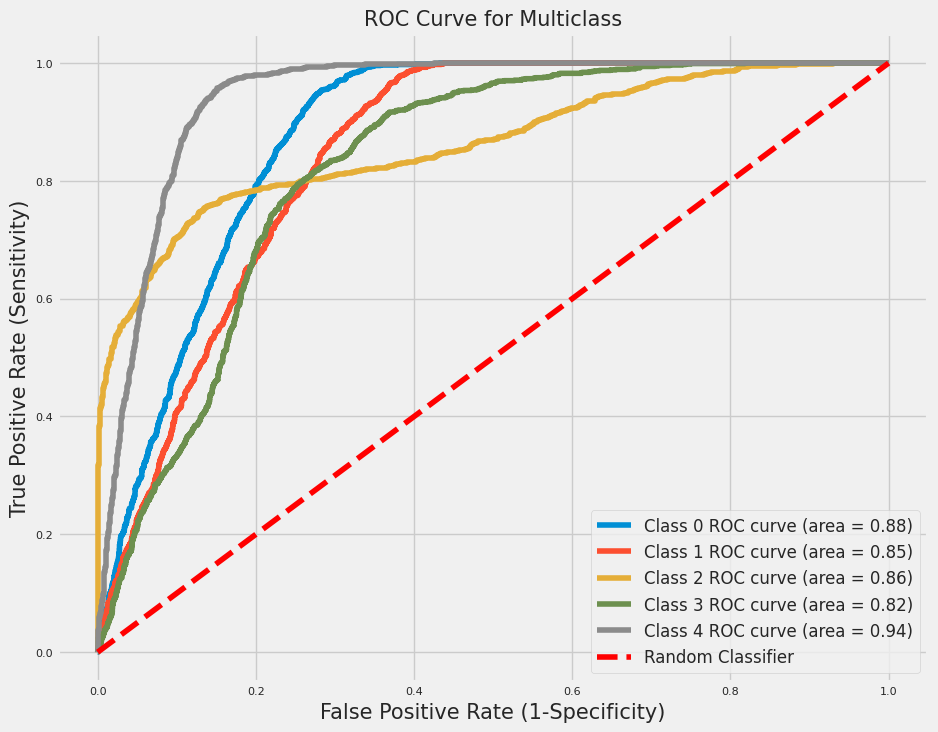

In [210]:
roc_plot(logistic_model)

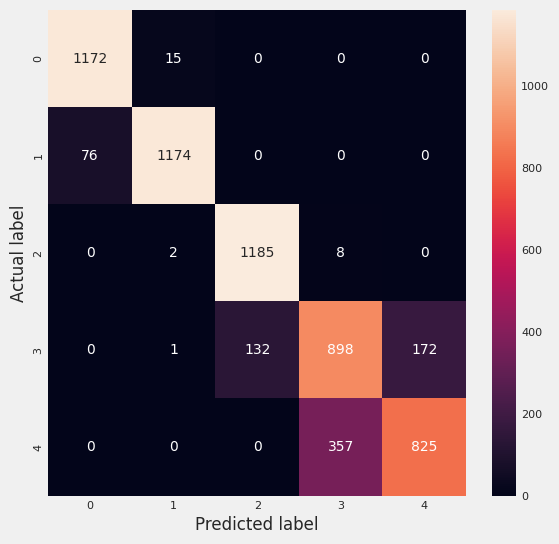

In [211]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## GaussianNB

In [212]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

ypred = gnb.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


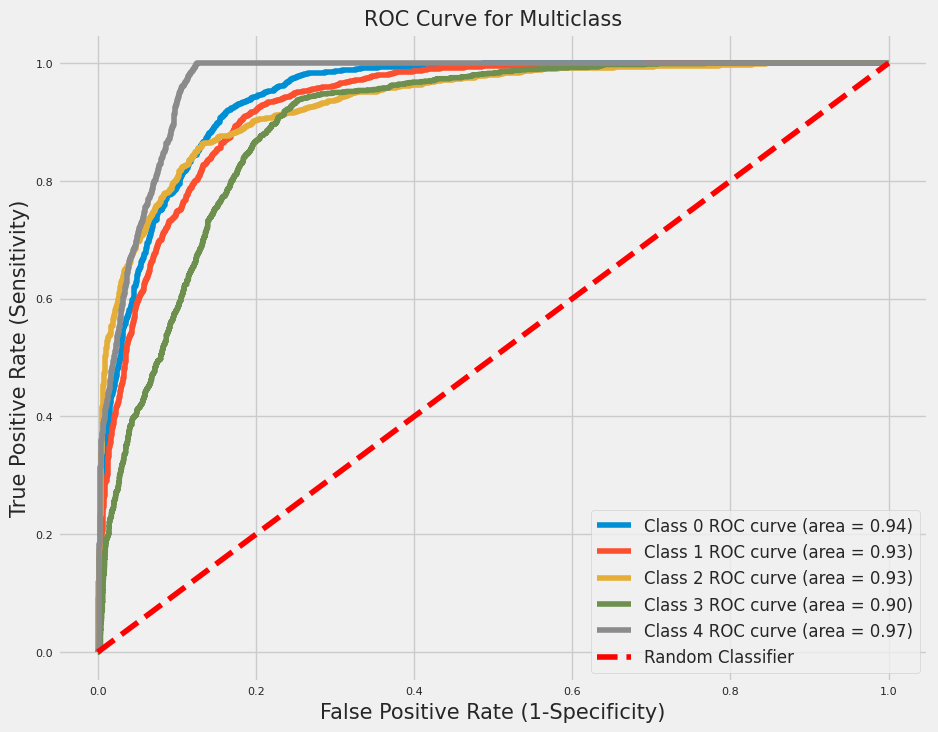

In [213]:
roc_plot(gnb)

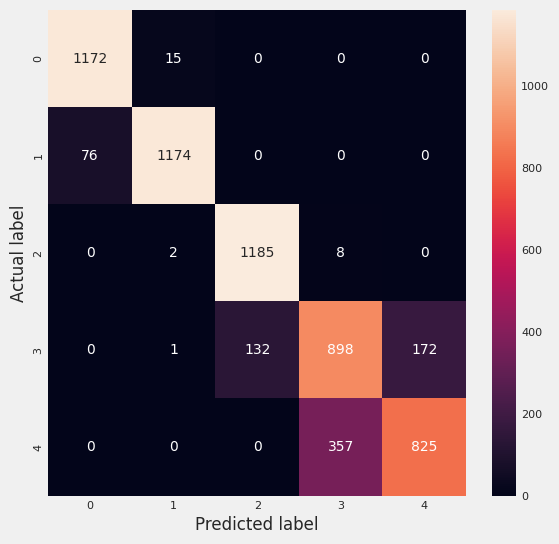

In [214]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## KNN

In [215]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

ypred = knn.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


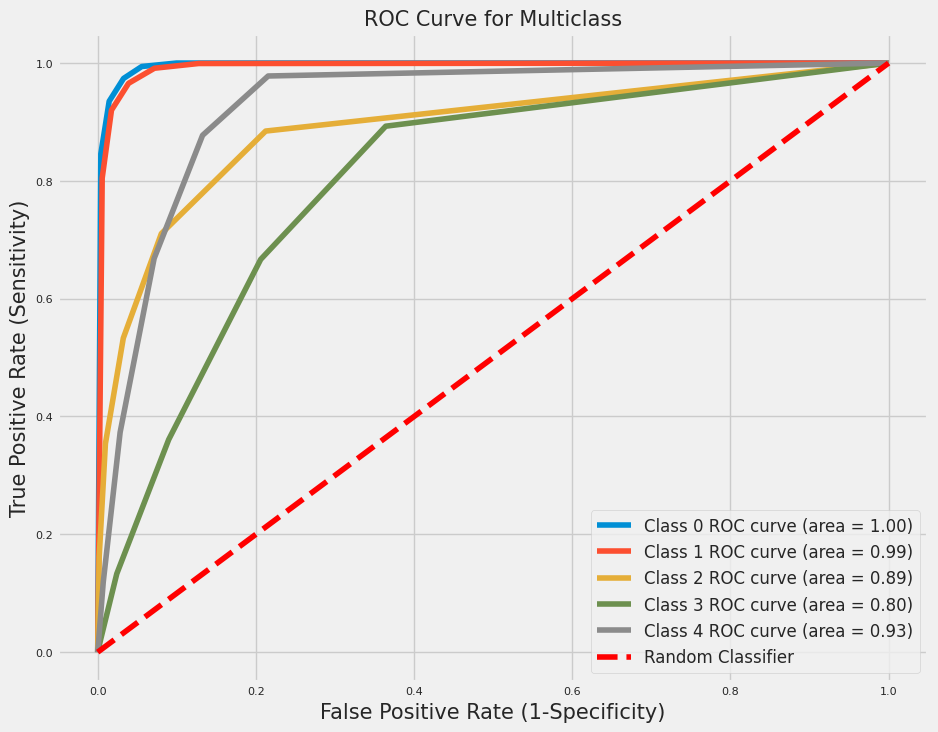

In [216]:
roc_plot(knn)

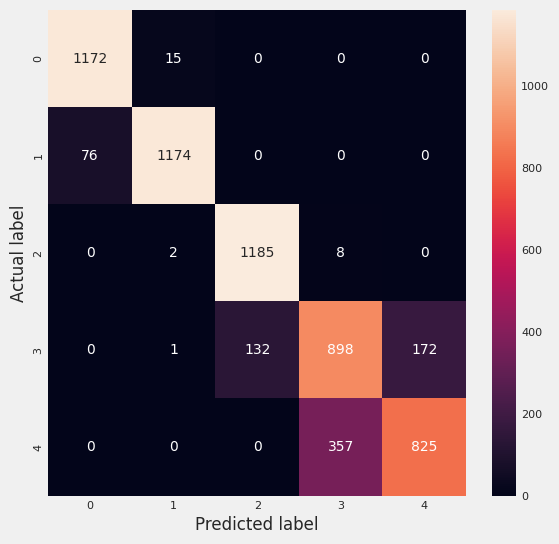

In [217]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## Random Forest Classifier

In [218]:
rf = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='log2' , min_samples_split= 2 , n_estimators= 200)
rf.fit(X_train , y_train)

ypred = rf.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


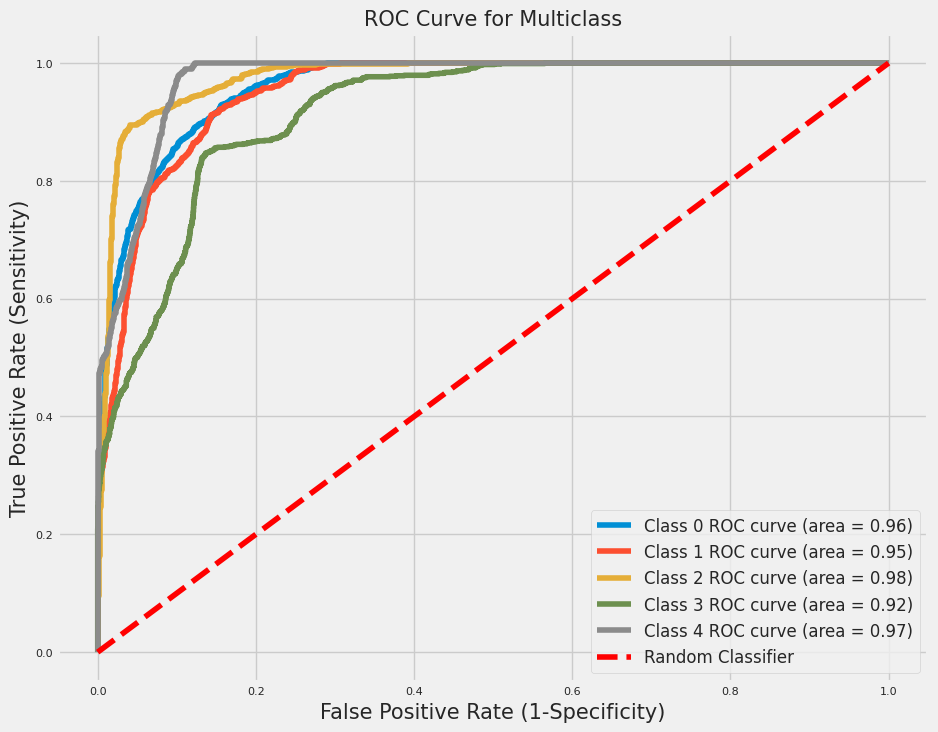

In [219]:
roc_plot(rf)

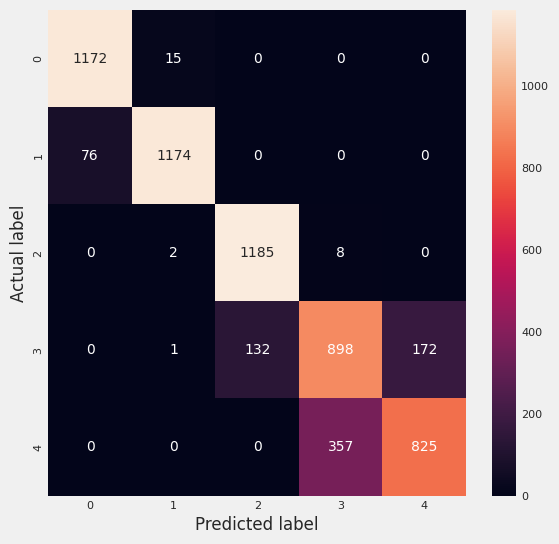

In [220]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

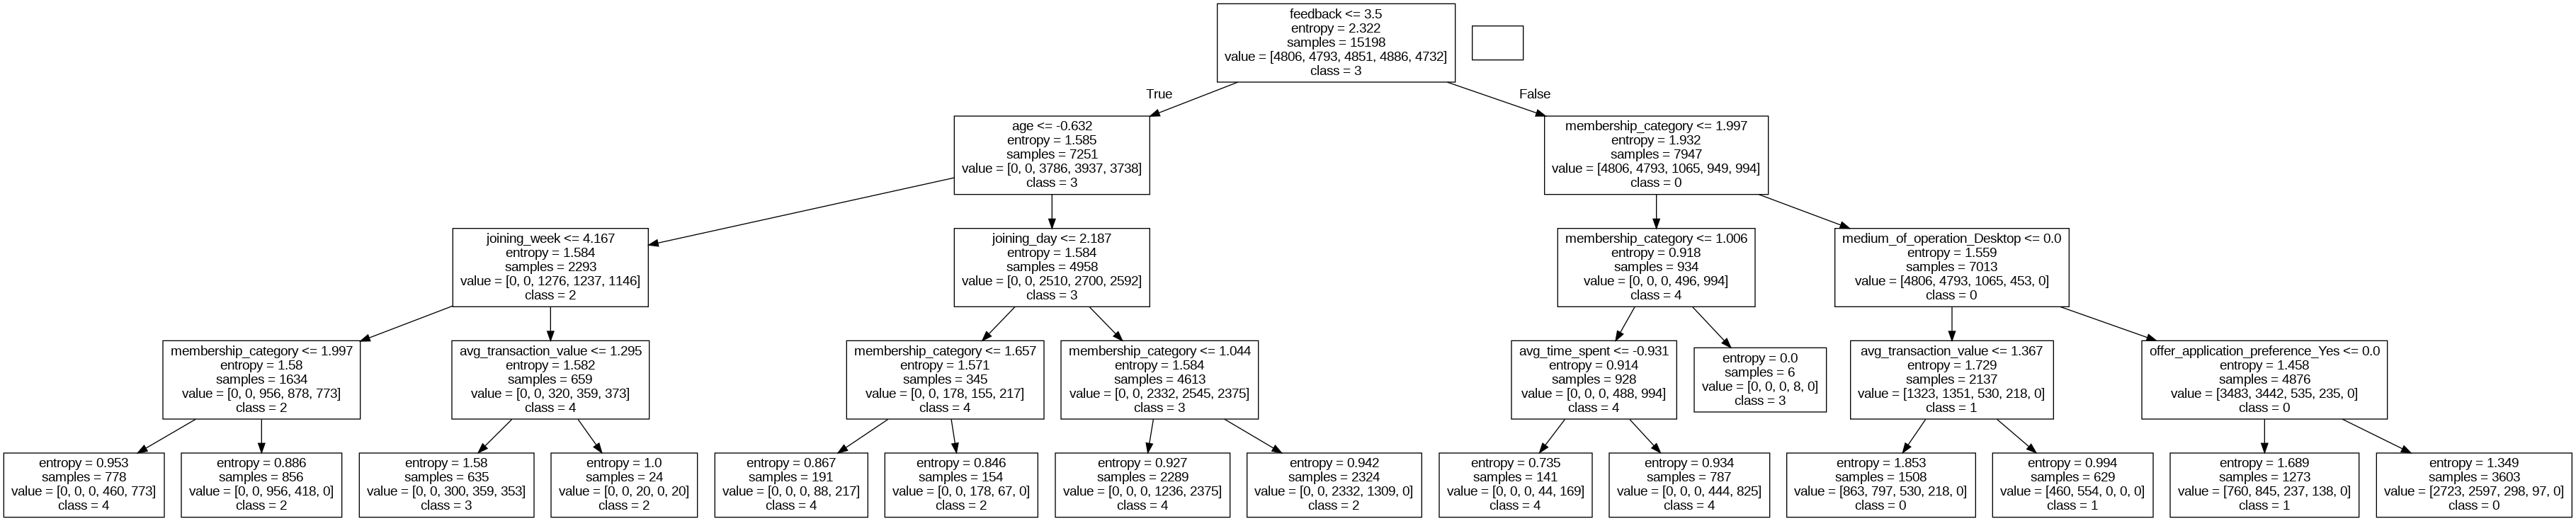

In [227]:
labels = df_train.drop(['churn_risk_score'],axis=1).columns.values
dot_data = tree.export_graphviz(rf[0], feature_names = labels, class_names = ["0","1", '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Ada Boosting

In [228]:
ab = AdaBoostClassifier(n_estimators=1000, learning_rate = 0.1, random_state=0)
ab.fit(X_train , y_train)

ypred = ab.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1187
         2.0       0.98      0.94      0.96      1250
         3.0       0.90      0.99      0.94      1195
         4.0       0.71      0.75      0.73      1203
         5.0       0.83      0.70      0.76      1182

    accuracy                           0.87      6017
   macro avg       0.87      0.87      0.87      6017
weighted avg       0.87      0.87      0.87      6017

0.8706279338806769


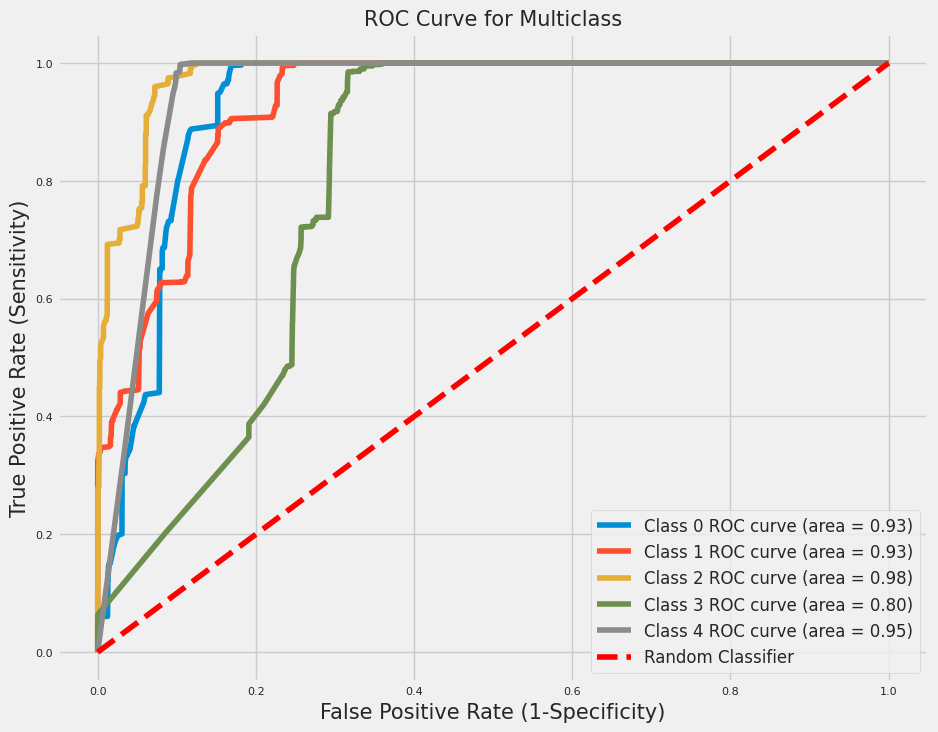

In [229]:
roc_plot(ab)

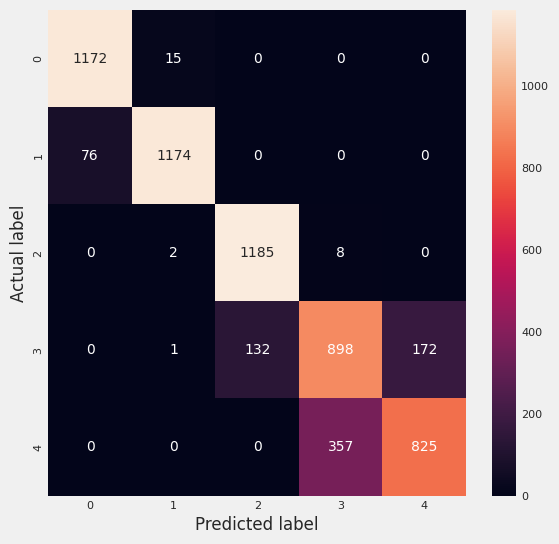

In [230]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## XGB Boosting

In [232]:
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 300)

y_train_adj = y_train - 1
y_test_adj = y_test - 1

xgb.fit(X_train, y_train_adj)

y_pred_adj = xgb.predict(X_test)
y_pred = y_pred_adj + 1


print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      1187
         2.0       0.98      0.98      0.98      1250
         3.0       0.94      0.95      0.95      1195
         4.0       0.75      0.72      0.73      1203
         5.0       0.78      0.80      0.79      1182

    accuracy                           0.89      6017
   macro avg       0.89      0.89      0.89      6017
weighted avg       0.89      0.89      0.89      6017

0.8863030594143707


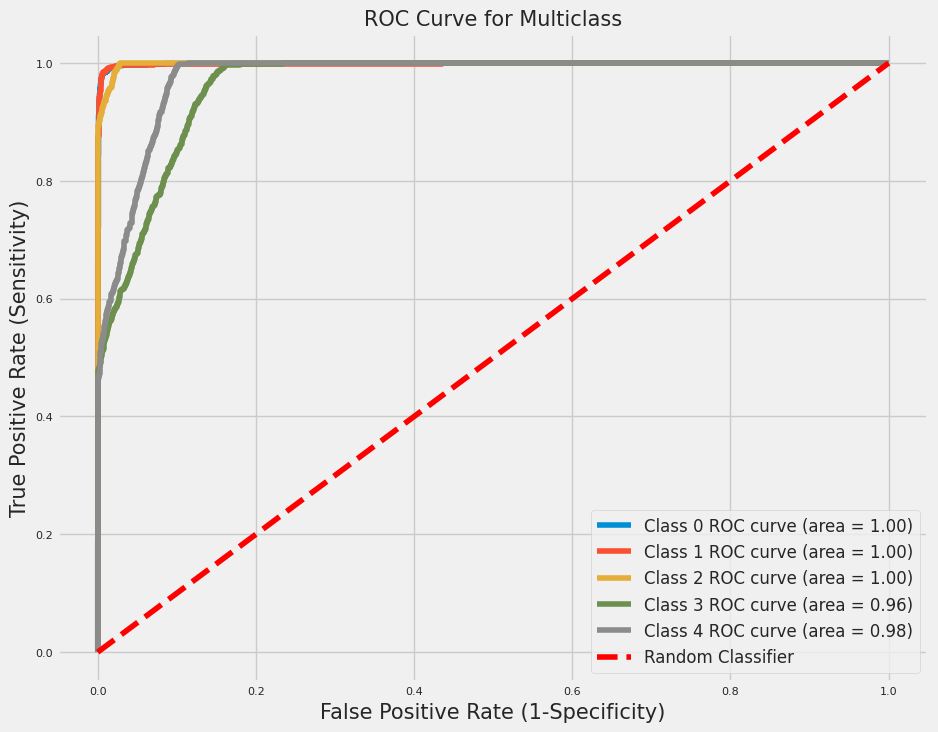

In [233]:
roc_plot(xgb)

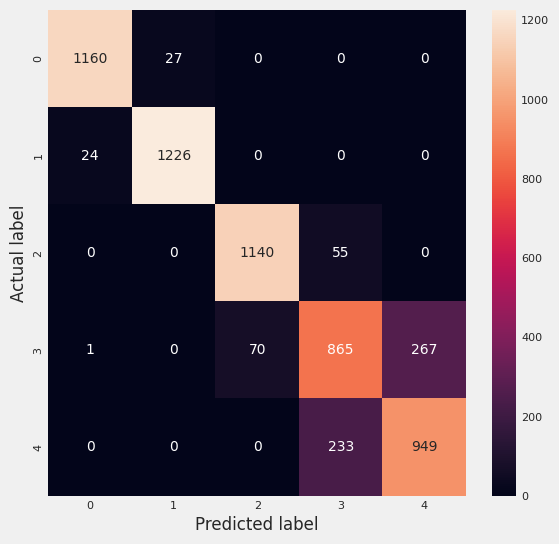

In [234]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

# Task 6 Model Performance

In [235]:
y_predtr = logistic_model.predict(X_train)
y_pred1tr = gnb.predict(X_train)
y_pred2tr = knn.predict(X_train)
y_pred3tr = rf.predict(X_train)
y_pred4tr = ab.predict(X_train)
y_pred5tr = xgb.predict(X_train)

In [236]:
y_pred = logistic_model.predict(X_test)
y_pred1 = gnb.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = ab.predict(X_test)
y_pred5 = xgb.predict(X_test)

In [238]:
comp = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','KNN','Random Forest','AdaBoost','XGBoost'],
                    'Train Accuracy':[accuracy(y_train,y_predtr), accuracy(y_train,y_pred1tr), accuracy(y_train,y_pred2tr), accuracy(y_train,y_pred3tr),
                                      accuracy(y_train,y_pred4tr), accuracy(y_train,y_pred5tr)],
                    'Test Accuracy':[accuracy(y_test,y_pred), accuracy(y_test,y_pred1), accuracy(y_test,y_pred2), accuracy(y_test,y_pred3),
                                      accuracy(y_test,y_pred4), accuracy(y_test,y_pred5)],
                    'Test f1-Score':[f1(y_test,y_pred), f1(y_test,y_pred1), f1(y_test,y_pred2), f1(y_test,y_pred3),
                                      f1(y_test,y_pred4), f1(y_test,y_pred5)]}
                    )

comp.head(10)

Model  Train Accuracy  Test Accuracy  Test f1-Score
0  Logistic Regression        0.565232       0.558916       0.551207
1          Naive Bayes        0.698230       0.695529       0.689334
2                  KNN        0.824497       0.729766       0.717611
3        Random Forest        0.787519       0.786771       0.773213
4             AdaBoost        0.687136       0.693535       0.625795
5              XGBoost        0.000000       0.058002       0.048289

# Task 7 Model Ensemble

## Voting Classifier

In [239]:
clf1 = KNeighborsClassifier(n_neighbors= 11)
clf2 = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
clf3 = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01,random_state=0)
vclf = VotingClassifier(estimators=[('KNN', clf1), ('Random_Forest', clf2), ('AdaBoost' , clf3)],
                                   voting='soft')

In [240]:
vclf.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=11)),
                             ('Random_Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     n_estimators=300,
                                                     random_state=0)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=0.01,
                                                 n_estimators=250,
                                                 random_state=0))],
                 voting='soft')

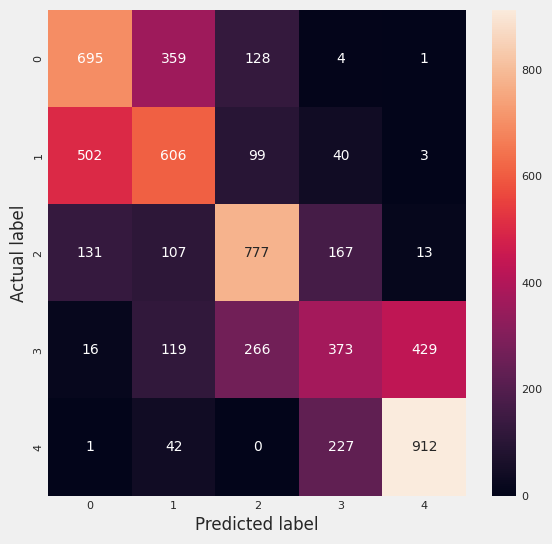

In [241]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [242]:
y_pred6tr = vclf.predict(X_train)
y_pred6 = vclf.predict(X_test)

## Stacking Classifier

In [243]:
estimators = [('Voting Classifier' , vclf),
              ('XGBoost', XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 100, verbosity = 0) )]

stackclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state= 0))

In [244]:
stackclf.fit(X_train, y_train)

StackingClassifier(estimators=[('Voting Classifier',
                                VotingClassifier(estimators=[('KNN',
                                                              KNeighborsClassifier(n_neighbors=11)),
                                                             ('Random_Forest',
                                                              RandomForestClassifier(criterion='entropy',
                                                                                     max_depth=4,
                                                                                     n_estimators=300,
                                                                                     random_state=0)),
                                                             ('AdaBoost',
                                                              AdaBoostClassifier(learning_rate=0.01,
                                                                                 n_estimators=250,
                                                                                 random_state=0))],
                                                 voting='soft')),
                               ('XGBoost',
                                XGBClas...
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=0, ...))],
                   final_estimator=LogisticRegression(random_state=0))

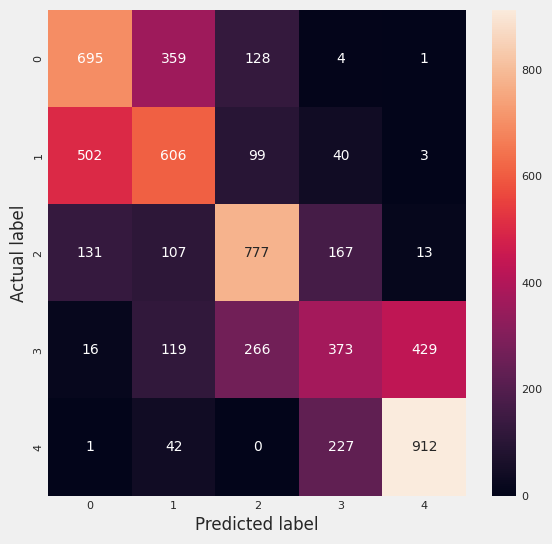

In [245]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [246]:
y_pred7tr = stackclf.predict(X_train)
y_pred7 = stackclf.predict(X_test)

## Final Results

In [250]:
comp1 = pd.DataFrame({'Model':['Voting Model'],
                      'Train Accuracy':[accuracy(y_train,y_pred6tr)],
                      'Test Accuracy':[accuracy(y_test,y_pred6)],
                      'Test f1-Score':[f1(y_test , y_pred6)]}
                      )

comp2 = pd.DataFrame({'Model':['Stacking Model'],
                      'Train Accuracy':[accuracy(y_train,y_pred7tr)],
                      'Test Accuracy':[accuracy(y_test,y_pred7)],
                      'Test f1-Score':[f1(y_test , y_pred7)]}
                      )

final_comp = pd.concat([comp, comp1, comp2], axis = 0)
final_comp.head(10)

Model  Train Accuracy  Test Accuracy  Test f1-Score
0  Logistic Regression        0.565232       0.558916       0.551207
1          Naive Bayes        0.698230       0.695529       0.689334
2                  KNN        0.824497       0.729766       0.717611
3        Random Forest        0.787519       0.786771       0.773213
4             AdaBoost        0.687136       0.693535       0.625795
5              XGBoost        0.000000       0.058002       0.048289
0         Voting Model        0.846394       0.799235       0.795862
0       Stacking Model        0.979558       0.884494       0.882231